## Introduction

Financial sector has emerged as the benchmark in leveraging the potential of data analtytics and machine learning to not only improve operations but to also proactively minimise the risks.

Our primary goal is to use data science tool as predictive modelling to build a strong framework capable of predicting loan outcomes.Our technique has the potential to help financial institutions to make more informed lending decisions.

SuperLender uses data driven a data-driven approach to assess the credit risk of its customers and determine the two fundermental drivers of repayment; `willingness` and `ability`.We will explore hoiw SuperLender uses machine learning models to predict loan outcomes and evaluate their performance


## Business Understanding

Defaulting borrowers cause significant financial losses, impacting profit margins and liquidity ultimately affecting long-term business sustainability. Moreover, loan defaults can tarnish a company's reputation, erode investor confidence, and hinder future borrowing opportunities. 

Super Lender a local digital lending company seeks to provide effective credit risk model which determines borrower’s chances of repaying a loan. In this project we seek to develop a credit risk model employing machine learning techniques. The model assesses historical data to predict potential defaults, enabling proactive risk management. Also the model informs credit manager and the institution’s employees on borrower important details to enable data driven decisions not only to deny or advance a loan  but targeted strategies, including personalized loan terms.

## Problem Statement

A defaulted loan is an expense to the business. There is a need for financial institutions to enhance their risk assessment strategies and only lend responsibly.  As such predicting customer loan defaults is central to minimizing financial risks and ensuring sustainable lending practices. Chances of customer paying their loan are influenced by demographics and past financial details. The challenge is for financial institutions to distinguish customers who can pay loans and only lend to them.

## Main Objective

To develop a model which predicts customer loan repayment chances

## Specific Objective

* Determine which demographic factors affects customer loan repayment chances
*	Determine which past financial details and behavior affects customer loan repayment chances
*	To develop a UI which informs credit manager on customer’s loan repayment details. 

## Data Understanding

We will leverage datasets from Zindi, Africa's premier professional network for data scientists. Our focus centers on three distinct datasets for both training and testing purposes.

> a) Demographic data
- **customerid (Primary Key):** This serves as a unique identifier, ensuring the traceability of borrowers' histories across multiple datasets.
- **birthdate (Date of Birth of the Customer):** This feature provides valuable insights into borrowers' ages, a factor often correlated with financial stability and their ability to meet loan obligations.
- **bank_account_type (Type of Primary Bank Account):** This field reflects the customer's banking preferences and can indicate their financial stability.
- **latitude_gps / longitude_gps:** Geographic coordinates enable the assessment of regional risk factors that may influence borrowers' repayment tendencies.
- **bank_name_clients (Name of the Bank):** The choice of bank can offer insights into banking history and its potential impact on loan behavior.
- **bank_branch_clients (Location of the Branch):** If available, this provides additional context about borrowers' banking relationships.
- **employment_status_clients:** The employment status is a critical factor in determining income stability and the ability to repay loans.
- **level_of_education_clients:** Education level reflects financial literacy and potential income, affecting loan behavior.

> b) Perfomance data
- **customerid (Primary Key):** This identifier associates loan performance with individual borrowers, ensuring a comprehensive analysis.
- **systemloanid (Loan ID):** A unique identifier for each loan, allowing for tracking specific loan histories.
- **loannumber (Number of the Loan Being Predicted):** Understanding a borrower's history of loan applications is crucial for assessing their ability to manage multiple financial commitments.
- **approveddate (Date Loan Was Approved):** This feature facilitates historical trend analysis in loan approval, considering potential changes in economic conditions and lending policies over time.
- **loan amount:** A critical predictor of loan default, as larger loans may pose greater repayment challenges, increasing the risk of default.
- **totaldue (Total Repayment Required):** This helps assess the borrower's capacity to meet their financial obligations.
termdays (Loan Term): Loan duration can significantly impact default risk, as longer-term loans may have different default patterns compared to shorter-term loans.
- **referredby:** If available, this feature provides insights into customer referrals, which may influence loan behavior.
- **good_bad_flag (Loan Performance):** Accurate prediction of good_bad_flag is the central objective of the project.

> c) Previous loans data
- **customerid (Primary Key):** Similar to other datasets, this identifier ensures the association of historical loan data with individual borrowers for comprehensive analysis.
- **systemloanid (Loan ID):** A unique identifier for each loan, allowing tracking of specific loan histories.
loannumber (Number of the Loan Being Predicted): Understanding borrowers' historical borrowing patterns and their potential influence on current defaults.
- **approveddate (Date Loan Was Approved):** This feature provides timing information for previous loans, which is crucial for understanding loan behavior over time.
- **creationdate (Date Loan Was Created):** Similar to approveddate, it offers insights into the timing of loan applications.
- **loan amount:** Reflects the loan amount associated with previous loans.
- **totaldue (Total Repayment Required):** Helps assess the borrower's capacity to meet their financial obligations.
- **closeddate (Date Loan Was Settled):** Indicates when previous loans were paid off or settled, providing insights into past loan performance.
- **referredby:** If available, this feature offers insights into customer referrals, which may influence loan behavior.
- **firstduedate (Date of First Payment Due):** Provides information about the initial payment schedule.
- **firstrepaiddate (Actual Date of First Payment):** Records the date of the customer's first payment on previous loans, indicating their initial repayment behavior.

## Importing Libraries

In [54]:
#Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)

#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#Data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

#Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,\
GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#Model evaluation and selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#Model metrics and Visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.tree import plot_tree, export_text
from scipy.stats import chi2_contingency

In [55]:
# Loading the datasets
train_demographics = pd.read_csv("data/traindemographics.csv")
train_perf = pd.read_csv("data/trainperf.csv")
train_prev_loans = pd.read_csv("data/trainprevloans.csv")
test_demographics = pd.read_csv("data/testdemographics.csv")
test_perf = pd.read_csv("data/testperf.csv")
test_prev_loans = pd.read_csv("data/testprevloans.csv")

### Preview of Datasets

In [56]:
train_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [57]:
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [58]:
train_prev_loans.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [59]:
#checking the shapes of the train data
print (train_demographics.shape)
print (train_perf. shape)
print (train_prev_loans.shape)

(4346, 9)
(4368, 10)
(18183, 12)


## Data Preprocessing
* The data is  demographics data is enhanced before merging by creating customer location from coordinates 

In [60]:
def add_cities(train_demographics):
    city_polygons_file = 'city_polygons.geojson'
    ndf = gpd.read_file(city_polygons_file)
    
    df = train_demographics.copy()
    final_df = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(train_demographics['longitude_gps'], train_demographics['latitude_gps'])
    )

    result_gdf = gpd.sjoin_nearest(final_df, ndf, how='left', distance_col='distances')

    cols_to_drop = ['geometry', 'index_right', 'state_id', 'distances']

    result_gdf.drop_duplicates(subset=['customerid'], inplace=True)

    return result_gdf.drop(columns=cols_to_drop)

# Call the function with train_demographics dataset
train_demographics_with_cities = add_cities(train_demographics)

train_demographics_with_cities['customer_residency'] = train_demographics_with_cities.apply(
    lambda row: row['state_name'] if row['country_name'].lower() == 'nigeria' else 'diaspora',
    axis=1
)
# Drop the coordinates
train_demographics_with_cities.drop(columns=['longitude_gps', 'latitude_gps'], inplace=True)

In [61]:
train_demographics_with_cities.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'state_name', 'country_name',
       'customer_residency'],
      dtype='object')

#### The `trainperf` and `train_prev_loans` have same columns names. The columns names are renamed by adding `.perf` and `.prev`

In [62]:
columns_to_update = ['systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby']
train_perf.columns = [col + '.perf' if col in columns_to_update else col for col in train_perf.columns]

train_prev_loans.columns = [col + '.prev' if col in columns_to_update else col for col in train_prev_loans.columns]
print (train_perf. columns)
print(train_prev_loans.columns)

Index(['customerid', 'systemloanid.perf', 'loannumber.perf',
       'approveddate.perf', 'creationdate.perf', 'loanamount.perf',
       'totaldue.perf', 'termdays.perf', 'referredby.perf', 'good_bad_flag'],
      dtype='object')
Index(['customerid', 'systemloanid.prev', 'loannumber.prev',
       'approveddate.prev', 'creationdate.prev', 'loanamount.prev',
       'totaldue.prev', 'termdays.prev', 'closeddate', 'referredby.prev',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')


### Merging the train data

In [63]:
# Merging the training data using customer id as the key value
train_data = pd.merge(train_prev_loans, train_demographics_with_cities, on='customerid', how='left')
merged_data = pd.merge(train_data, train_perf, on='customerid', how='left')
merged_data.shape

(18183, 30)

In [64]:
# Displaying the merged data dataset
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,referredby.prev,firstduedate,firstrepaiddate,birthdate,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,state_name,country_name,customer_residency,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,referredby.perf,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,NaN,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,NaN,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,1972-01-15 00:00:00.000000,Other,Diamond Bank,NaN,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1984-09-18 00:00:00.000000,Other,EcoBank,NaN,Permanent,NaN,Gombe,Nigeria,Gombe,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1977-10-10 00:00:00.000000,Savings,First Bank,NaN,Permanent,NaN,Oyo,Nigeria,Oyo,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good


In [65]:
# Getting statistics about the data

print("Stats about the data :", merged_data.describe())

Stats about the data :        systemloanid.prev  loannumber.prev  loanamount.prev  totaldue.prev  \
count       1.818300e+04     18183.000000     18183.000000   18183.000000   
mean        3.018395e+08         4.189353     16501.237420   19573.202931   
std         9.367767e+04         3.249490      9320.547516   10454.245277   
min         3.016001e+08         1.000000      3000.000000    3450.000000   
25%         3.017766e+08         2.000000     10000.000000   11500.000000   
50%         3.018550e+08         3.000000     10000.000000   13000.000000   
75%         3.019197e+08         6.000000     20000.000000   24500.000000   
max         3.020003e+08        26.000000     60000.000000   68100.000000   

       termdays.prev  systemloanid.perf  loannumber.perf  loanamount.perf  \
count   18183.000000       1.818300e+04     18183.000000     18183.000000   
mean       26.692790       3.019804e+08         8.378320     25663.531870   
std        10.946556       1.343207e+04         4.28

# Data Cleaning 
* This section checks for missing values, placeholders, duplicates and data consistency

In [66]:
# Create 'referredby' column by combining 'referredby.perf' and 'referredby.prev', replacing missing values with 0
merged_data['referredby'] = (merged_data['referredby.perf'].notnull()).astype(int) + (merged_data['referredby.prev'].notnull()).astype(int)

# Optionally, drop the intermediate columns if needed
merged_data = merged_data.drop(['referredby.perf', 'referredby.prev'], axis=1)

#### Checking for Missing Values

In [67]:
#Check for missing values in each column
missing_values = merged_data.isnull().sum()

# Calculate the percentage of missing values
percentage_missing_values = (missing_values / len(merged_data)) * 100

# Create a DataFrame to display missing values and percentages
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': percentage_missing_values
})

# Sort the DataFrame by 'Percentage' column in descending order
sorted_missing_data = missing_data_summary.sort_values(by='Percentage', ascending=False)

print("Missing values summary sorted by percentage in descending order:")
print(sorted_missing_data)

Missing values summary sorted by percentage in descending order:
                            Missing Values  Percentage
bank_branch_clients                  18079   99.428037
level_of_education_clients           14719   80.949238
employment_status_clients             5873   32.299401
state_name                            4510   24.803388
customer_residency                    4510   24.803388
birthdate                             4510   24.803388
bank_account_type                     4510   24.803388
bank_name_clients                     4510   24.803388
country_name                          4510   24.803388
good_bad_flag                            0    0.000000
termdays.perf                            0    0.000000
totaldue.perf                            0    0.000000
loanamount.perf                          0    0.000000
creationdate.perf                        0    0.000000
approveddate.perf                        0    0.000000
systemloanid.perf                        0    0.000000


* `bank_branch_clients` have 94% missing values hence they are dropped.   
*  Even though `level_of_education_clients`, `employment_status_clients ` , `longitude_gps` and                          
`latitude_gps`,  `bank_account_type` , `birthdate`, `bank_name_clients` have between 24% and 80% missing values, they are kept as they have important demographic information.

In [68]:
# Dropping columns with missing values as indicated above 
merged_data.drop(columns=['bank_branch_clients'], inplace=True)     

### Checking for outliers

In [69]:
columns_to_check = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 'termdays.perf']

# Identify outliers using IQR method
def find_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    return outliers

for column in columns_to_check:
    outliers = find_outliers(merged_data[column])
    num_outliers = len(outliers)
    print(f" Number of Outliers {column}  {num_outliers}")

 Number of Outliers loanamount.prev  978
 Number of Outliers totaldue.prev  676
 Number of Outliers termdays.prev  1023
 Number of Outliers loanamount.perf  0
 Number of Outliers totaldue.perf  0
 Number of Outliers termdays.perf  5240


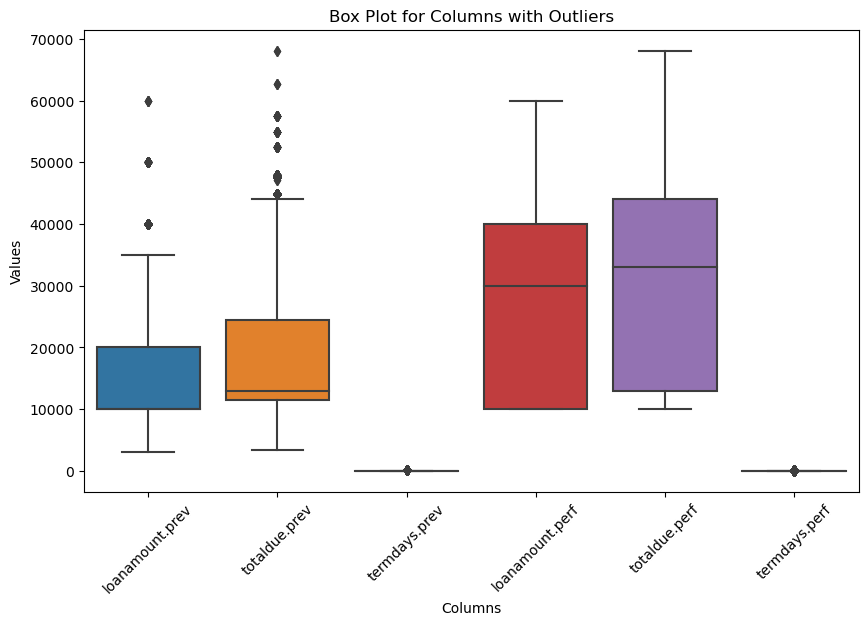

In [70]:
# List of columns to check for outliers
columns_to_check = ['loanamount.prev', 'totaldue.prev', 'termdays.prev', 'loanamount.perf', 'totaldue.perf', 'termdays.perf']

# Create box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[columns_to_check])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot for Columns with Outliers')
plt.show()

* The data  has outliers. However, domain knowledge shows that its expected where people borrow different amount of loans. The outliers are true events hence were included in the data 

### Check for  Row Duplicates

In [71]:
duplicates = merged_data.duplicated(keep=False).sum()
print("Number of duplicated rows in merged_data:", duplicates)

Number of duplicated rows in merged_data: 0


### Check for Data Consistency and Placeholders 

In [72]:
for column in merged_data.columns:
    unique_values = merged_data[column].unique()
    placeholders = [value for value in unique_values if str(value).lower() in ['placeholder', 'na', 'n/a', 'none']]
    placeholder_count = len(placeholders)    
    print(f"Placeholders for {column}, {placeholder_count}\n")

Placeholders for customerid, 0

Placeholders for systemloanid.prev, 0

Placeholders for loannumber.prev, 0

Placeholders for approveddate.prev, 0

Placeholders for creationdate.prev, 0

Placeholders for loanamount.prev, 0

Placeholders for totaldue.prev, 0

Placeholders for termdays.prev, 0

Placeholders for closeddate, 0

Placeholders for firstduedate, 0

Placeholders for firstrepaiddate, 0

Placeholders for birthdate, 0

Placeholders for bank_account_type, 0

Placeholders for bank_name_clients, 0

Placeholders for employment_status_clients, 0

Placeholders for level_of_education_clients, 0

Placeholders for state_name, 0

Placeholders for country_name, 0

Placeholders for customer_residency, 0

Placeholders for systemloanid.perf, 0

Placeholders for loannumber.perf, 0

Placeholders for approveddate.perf, 0

Placeholders for creationdate.perf, 0

Placeholders for loanamount.perf, 0

Placeholders for totaldue.perf, 0

Placeholders for termdays.perf, 0

Placeholders for good_bad_flag, 0

* The data does not have placeholders and there is consistency in the columns

##  Exploratory Data Analysis

#### Univariate Analysis

#### Loan Defaults

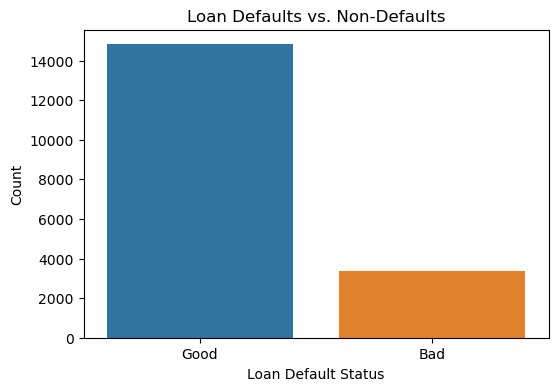

In [73]:
# Bar graph for 'good_bad_flag'
default_counts = merged_data['good_bad_flag'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=default_counts.index, y=default_counts.values)
plt.xlabel('Loan Default Status')
plt.ylabel('Count')
plt.title('Loan Defaults vs. Non-Defaults')
plt.show()


* Most customers paid loans while  less than 10% defaulted 

##### Distribution of customer demographics

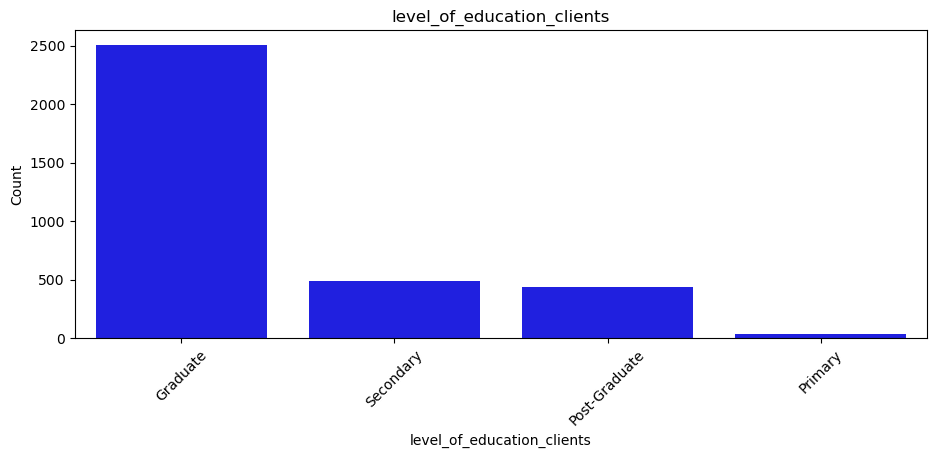

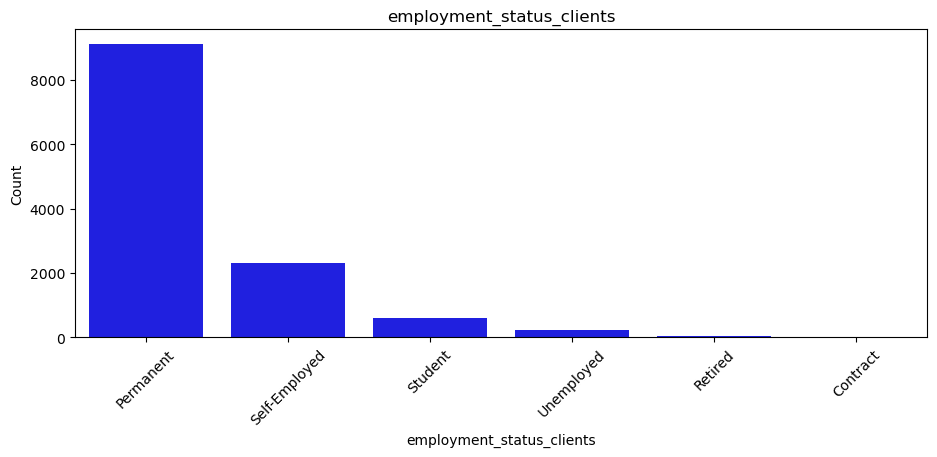

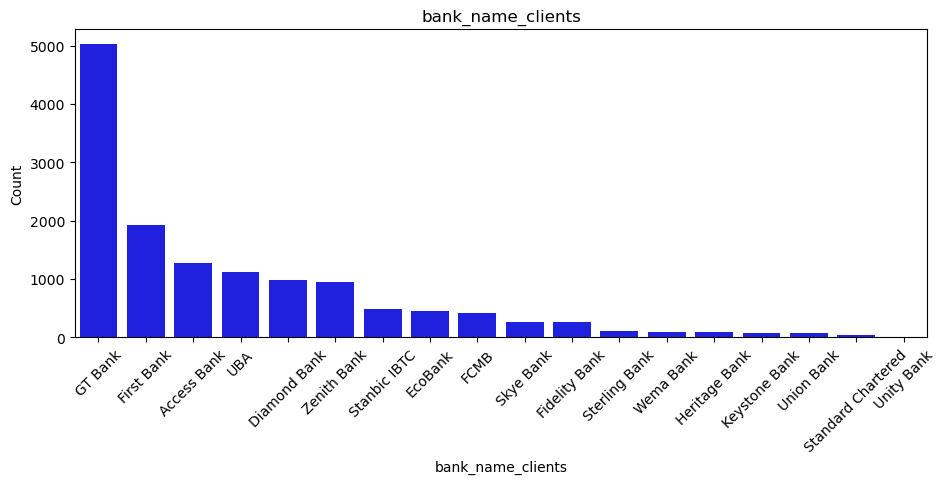

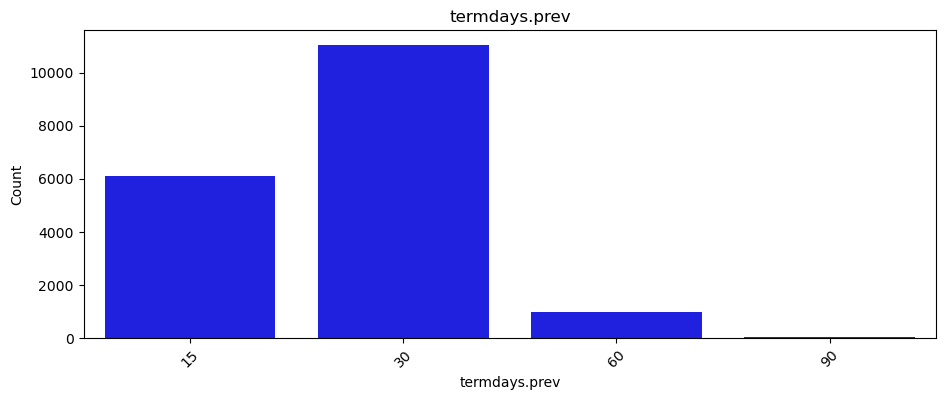

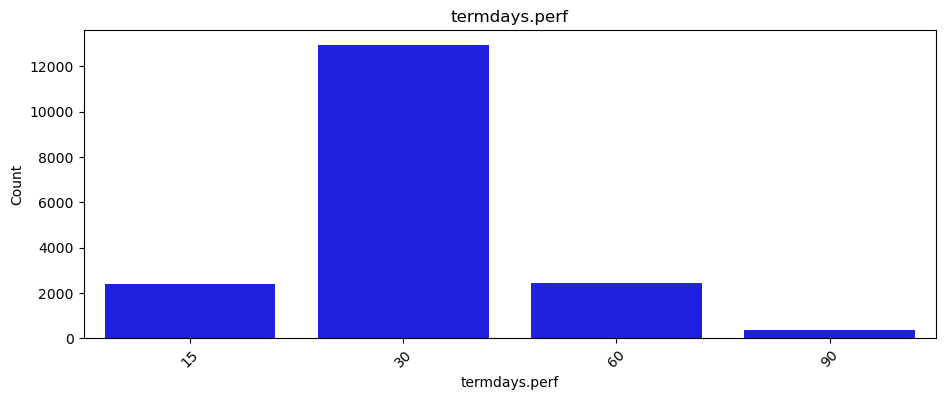

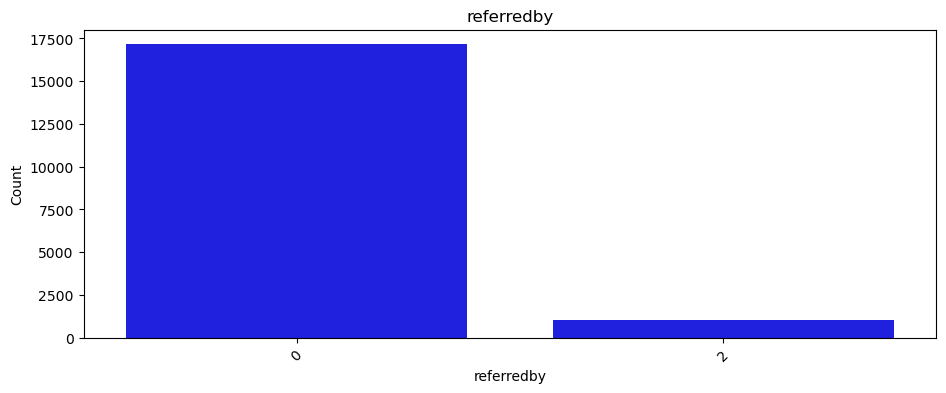

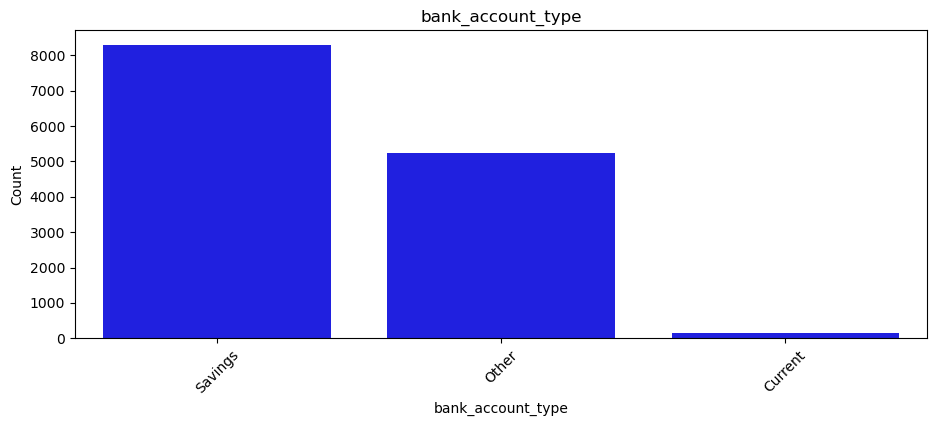

In [74]:
# Select  columns
columns = ['level_of_education_clients', 'employment_status_clients', 
                     'bank_name_clients', 'termdays.prev', 'termdays.perf','referredby','bank_account_type']

for column in columns:
    counts_df = merged_data[column].value_counts().reset_index()
    counts_df.columns = [column, 'Count']
    sorted_counts_df = counts_df.sort_values(by='Count', ascending=False)
    
    # Create a bar graph
    plt.figure(figsize=(11, 4))
    sns.barplot(x=column, y='Count', data=sorted_counts_df, color='blue')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column}')
    plt.xticks(rotation=45) 
    plt.show()

* Most of the customers had `graduate level` of education, followed by `post-graduate` and `secondary` education as their highest level of education. Very few customers have Primary education.
* A majority of customers are employed `permanently` followed by those who are `self-Employed` and Students. Few customers were `unemployed` and `retired` 
* A majority of the customers banked with `GT Bank` followed by First Bank, Access Bank, and UBA. Other banks have a smaller number of clients.
* Most of the previous loans have a term duration of `30 days`, followed by `15 days`. There are also loans with durations of 60 days and 90 days, but these are much less common.


#### Distribution of customer residency

Text(0.5, 1.0, 'Customer Residency Status')

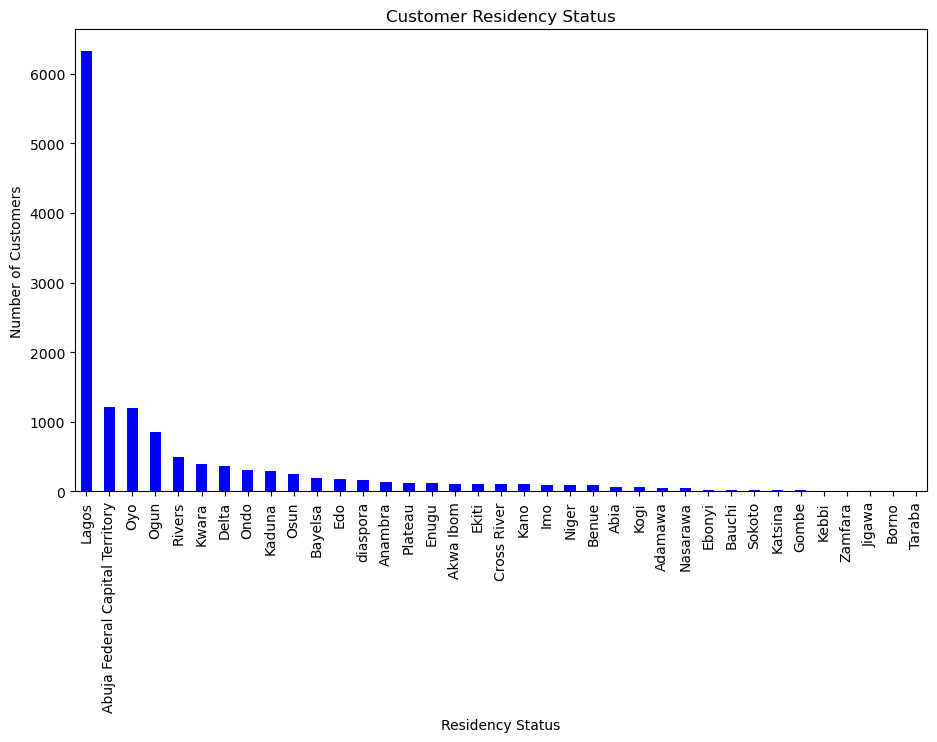

In [75]:
residency_counts = merged_data['customer_residency'].value_counts().sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(11, 6))
residency_counts.plot(kind='bar', color='blue')
plt.xlabel('Residency Status')
plt.ylabel('Number of Customers')
plt.title('Customer Residency Status')

* Most customers reside in `Lagos` 
* After Lagos, Abuja Federal Capital Territory, Oyo, and Ogun have relatively high counts of beteeen 1200 and 900 
* 13 states have `less than 200` customers 
* There were 159 customers `outside` Nigeria


#### Distribution of numeric variables

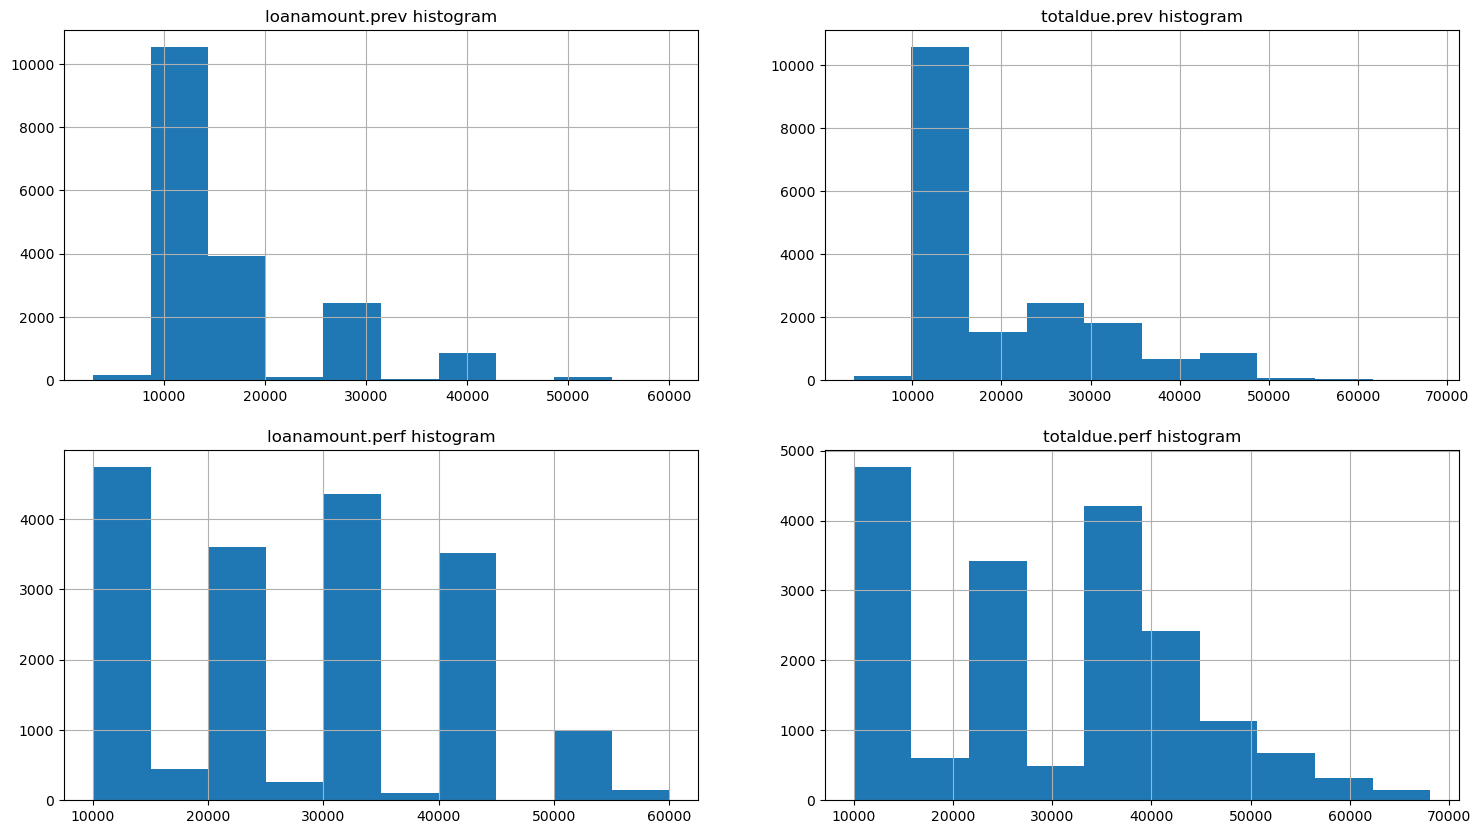

In [76]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18, 10))
hist_cols = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
for i, ax in enumerate(axs.flatten()):
    merged_data[hist_cols[i]].hist(ax=ax)
    ax.set_title(f'{hist_cols[i]} histogram')

##### Categorize the loan amount and loan due
* To further understand customer loan status we categorized the columns into a ranges of 10,000 and renamed the categories with their corresponding ranges

In [77]:
def create_categorical_columns(dataframe):
    bins = [i for i in range(0, 10000, 10000)] + [i for i in range(10000, int(dataframe['loanamount.prev'].max()) + 10000, 10000)]
    labels = [f'{i}-{i+9999}' for i in range(0, 10000, 10000)] + [f'{i}-{i+9999}' for i in range(10000, int(dataframe['loanamount.prev'].max()) + 10000, 10000)]
    categorical_columns = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
    
    for column in categorical_columns:
        new_column_name = f'{column}_categorical'
        dataframe[new_column_name] = pd.cut(dataframe[column].astype(int), bins, labels=labels[:-1], right=False)
    
    return dataframe
merged_data = create_categorical_columns(merged_data)

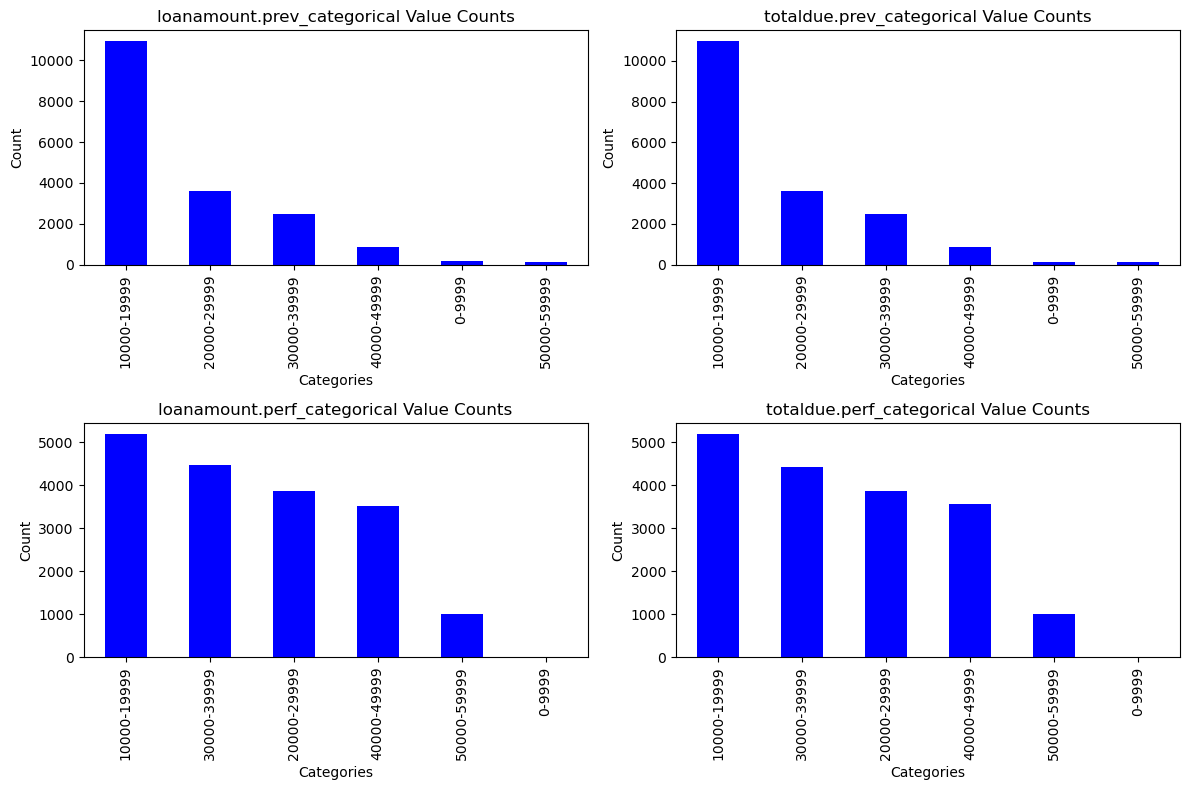

In [78]:
# Columns to analyze
columns_to_analyze = ['loanamount.prev_categorical', 'totaldue.prev_categorical',
                      'loanamount.perf_categorical', 'totaldue.perf_categorical']

def plot_categorical_value_counts(dataframe, columns):
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(columns, start=1):
        ax = plt.subplot(2, 2, i)
        value_counts = dataframe[column].value_counts().sort_values(ascending=False)
        value_counts.plot(kind='bar', ax=ax, color='blue')
        ax.set_title(f'{column} Value Counts')
        ax.set_xlabel('Categories')
        ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()
plot_categorical_value_counts(merged_data, columns_to_analyze)

* For `loanamount.prev`  most customers borrowed smaller amounts, with the highest count in the 10,000-19,999 range, followed by decreasing counts for higher ranges, indicating a trend of smaller loan amounts.
* Similarly, in `totaldue.prev` most customers borrowed between 10,000-19,999 with decreasing counts for larger range of loan amounts
* In the `loanamount.perf` most customer  have borrowed  30,000-39,999 .
* On the other hand, `totaldue.perf` most customers owe between 10,000-19,999

### Bivariate EDA

Loan default status versus loan amount and totaldue

In [79]:
# Columns to calculate mean
columns_to_calculate_mean = ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']
mean_values = merged_data.groupby('good_bad_flag')[columns_to_calculate_mean].mean()
print(mean_values)

               loanamount.prev  totaldue.prev  loanamount.perf  totaldue.perf
good_bad_flag                                                                
Bad               15138.954869   18084.679305     22790.973872   26981.250000
Good              16810.934863   19911.599663     26316.571043   30434.786068


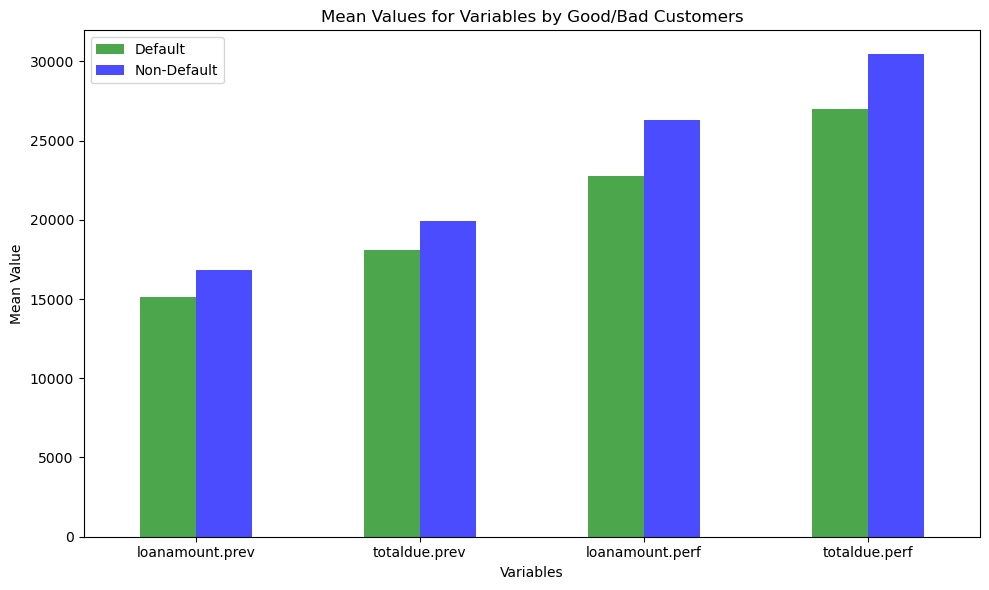

In [80]:
columns= ['loanamount.prev', 'totaldue.prev', 'loanamount.perf', 'totaldue.perf']

# Mean for each variable based on 'good_bad_flag'
mean_values = merged_data.groupby('good_bad_flag')[columns].mean()

# Plotting
mean_values.T.plot(kind='bar', figsize=(10, 6), color=['green', 'blue'], alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Mean Values for Variables by Good/Bad Customers')
plt.xticks(rotation=0)
plt.legend(['Default', 'Non-Default'])
plt.tight_layout()
plt.show()

* Customers who have `good` loan performance tend to borrow more money than those who have `bad` loan performance. 
*  Customers who have `good` loan performance have higher `current and previous loan` amounts as well as amounts due. This suggests that good customers have higher income or creditworthiness than bad customers

#### Distribution of amount borrowed and due categories versus loan default status

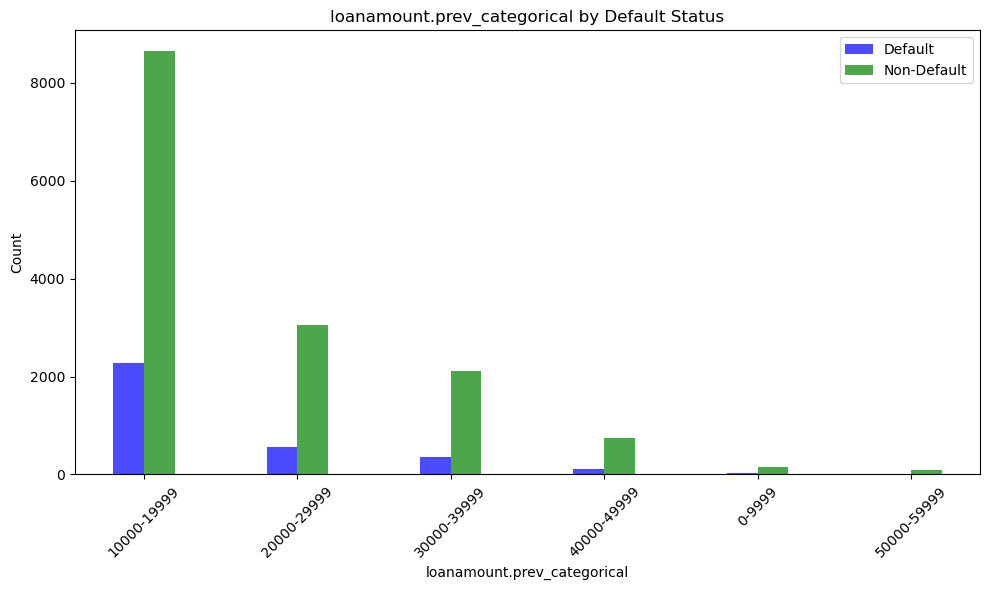

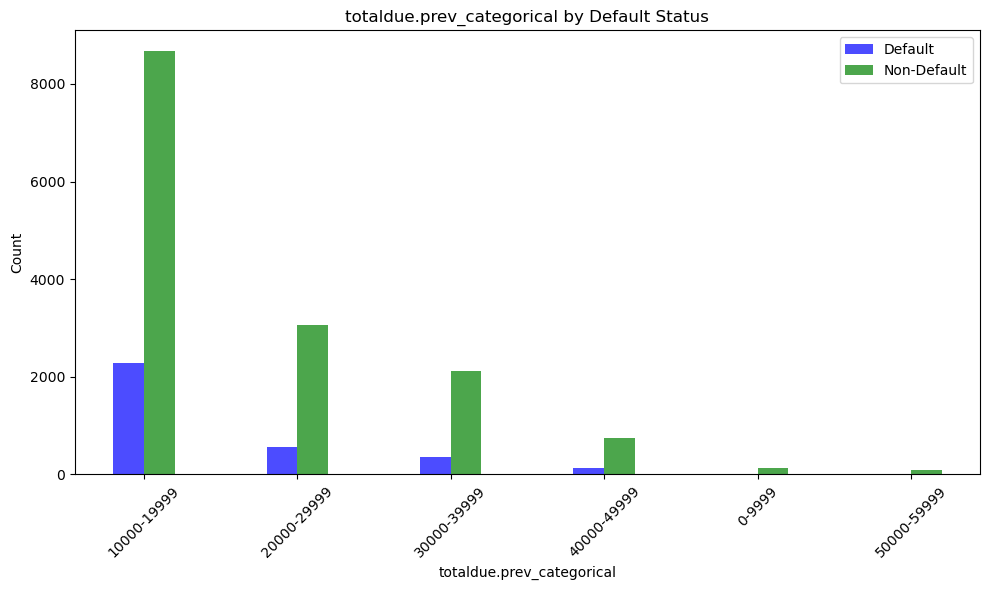

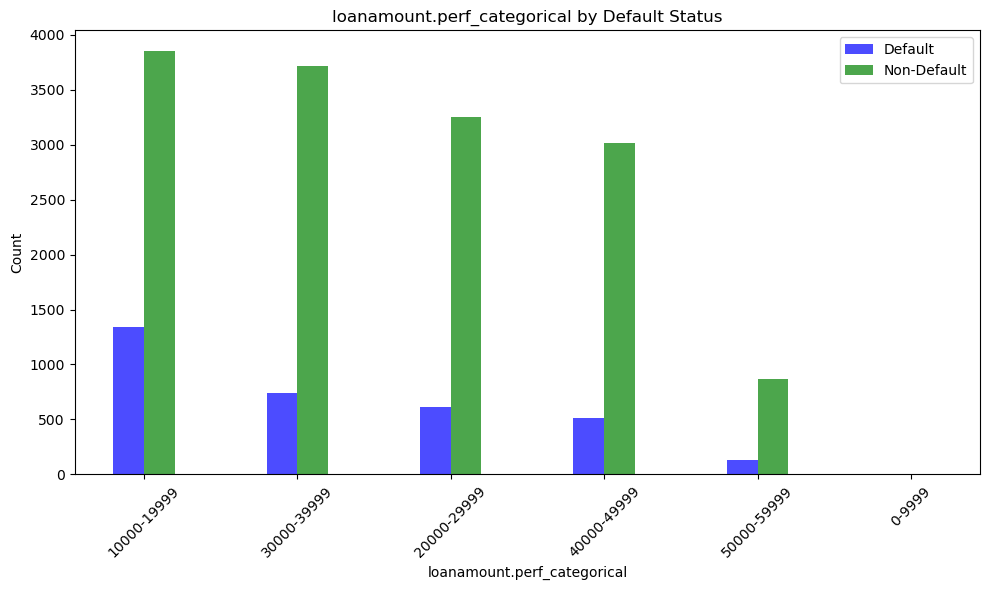

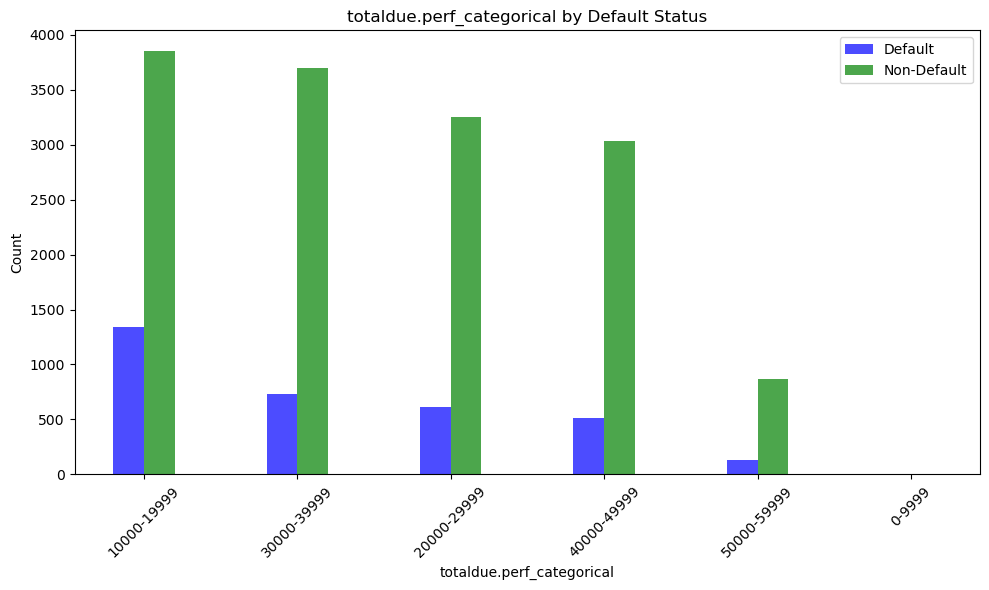

In [81]:
# Columns to analyze
columns_to_analyze = ['loanamount.prev_categorical', 'totaldue.prev_categorical',
                      'loanamount.perf_categorical', 'totaldue.perf_categorical']

for column in columns_to_analyze:
    # Group data by column and 'good_bad_flag', unstack and sort by 'Bad' flag
    value_counts = merged_data.groupby([column, 'good_bad_flag']).size().unstack()
    value_counts = value_counts.sort_values(by='Bad', ascending=False)
    
    # Plot side-by-side bars
    ax = value_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'], width=0.4, alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'{column} by Default Status')
    plt.xticks(rotation=45)
    plt.legend(['Default', 'Non-Default'])
    plt.tight_layout()
    plt.show()     

* For `loanamount.prev` most defaulters had borrowed 10,000-19,999 followed by 20,000-29,999  while the least defaults were those who borrowed  50,000-59,999 
* Similarly, for `totaldue.prev most defaulters owed the banks 10,000-19,999 followed by 20,000-29,999  while the least defaults were those who owed  borrowed  50,000-59,999 
* In relation to current loans, `loanamount.perf` most defaulters had borrowed 10,000-19,999 followed by those who had borrowed 30,000-39,999 while the fewest were those who had borrowed 50,000-59,999 
* For `totaldue.perf` the highest defaulters were those who owed 10,000-19,999 followed by 30,000-39,999 while the least defaulters were those who owed 50,000-59,999


#### Loan default status versus customer demographics

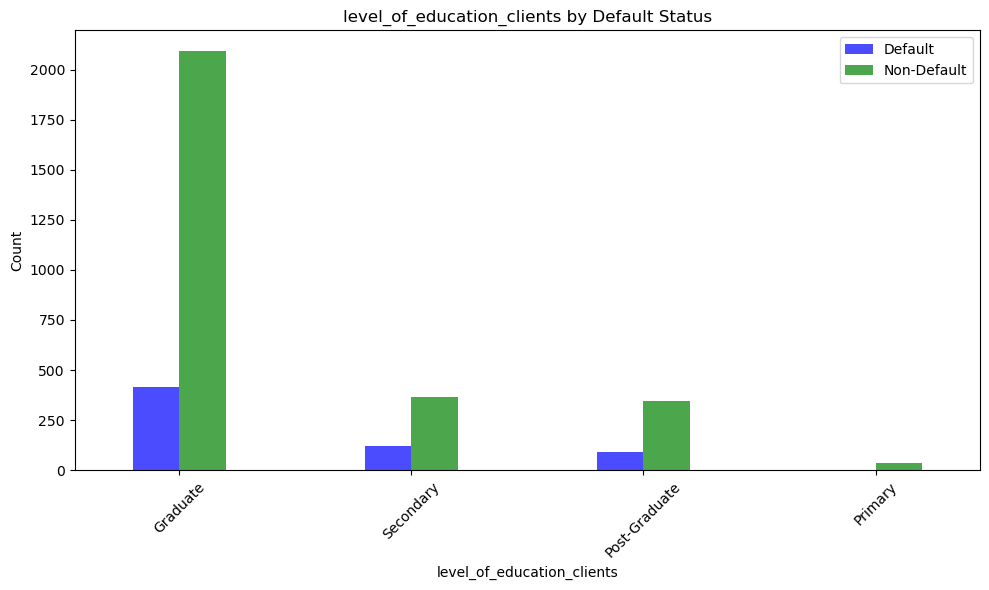

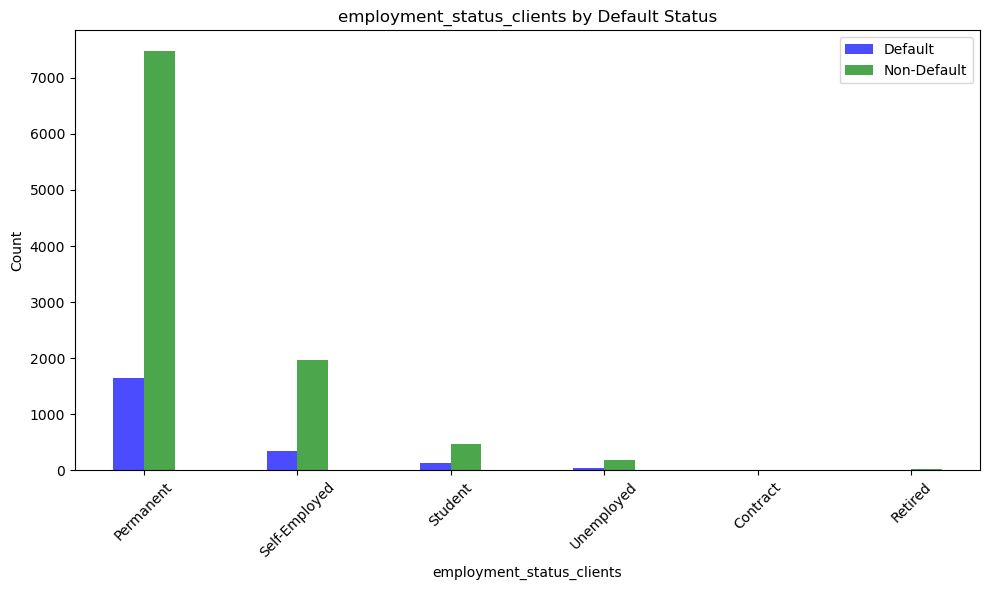

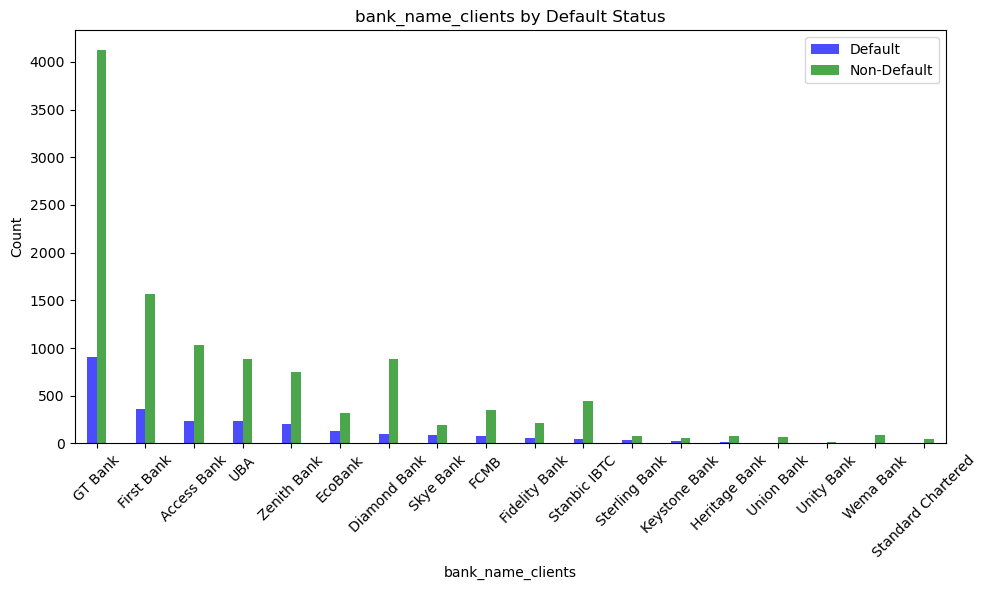

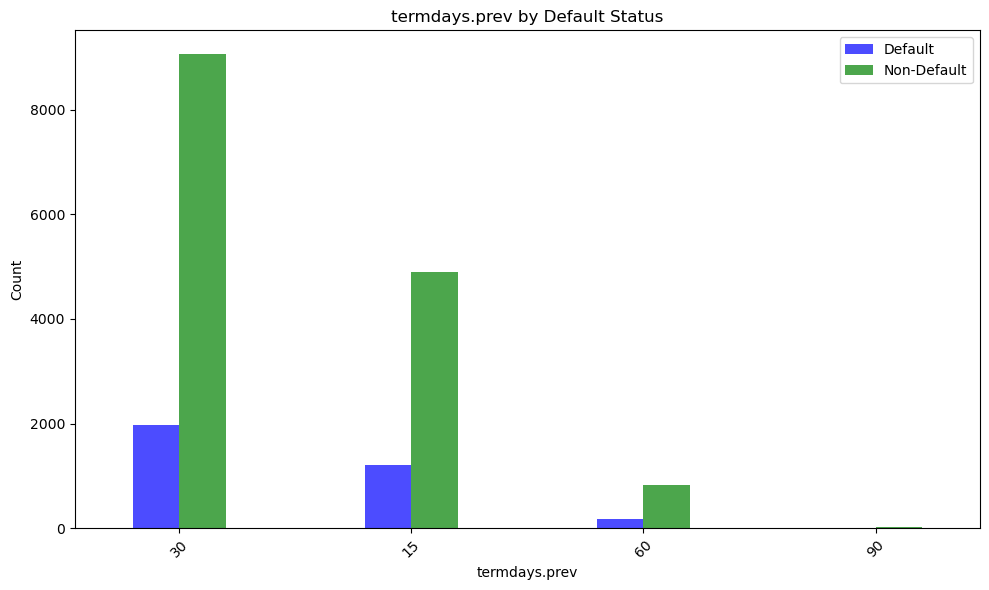

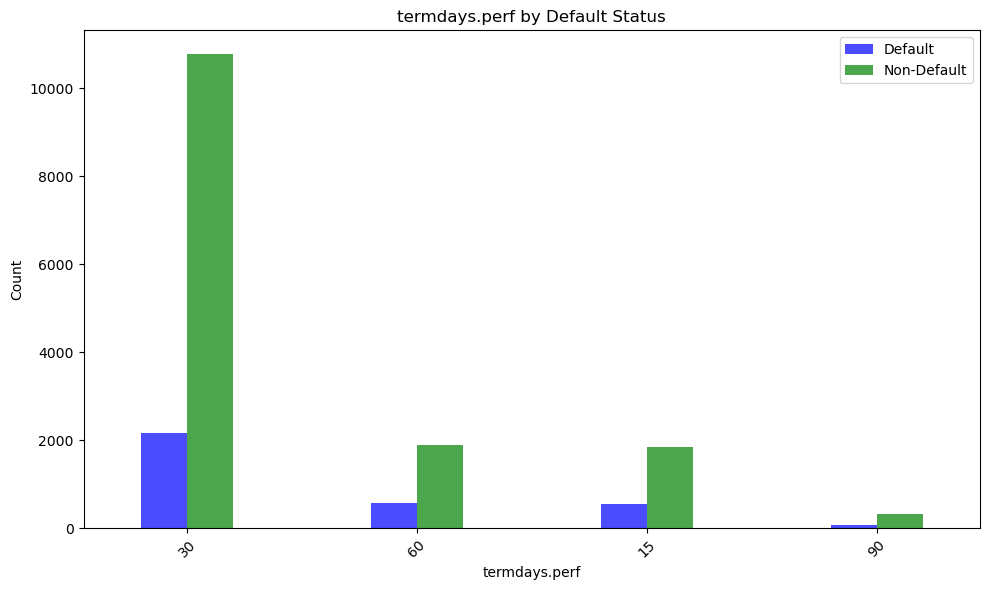

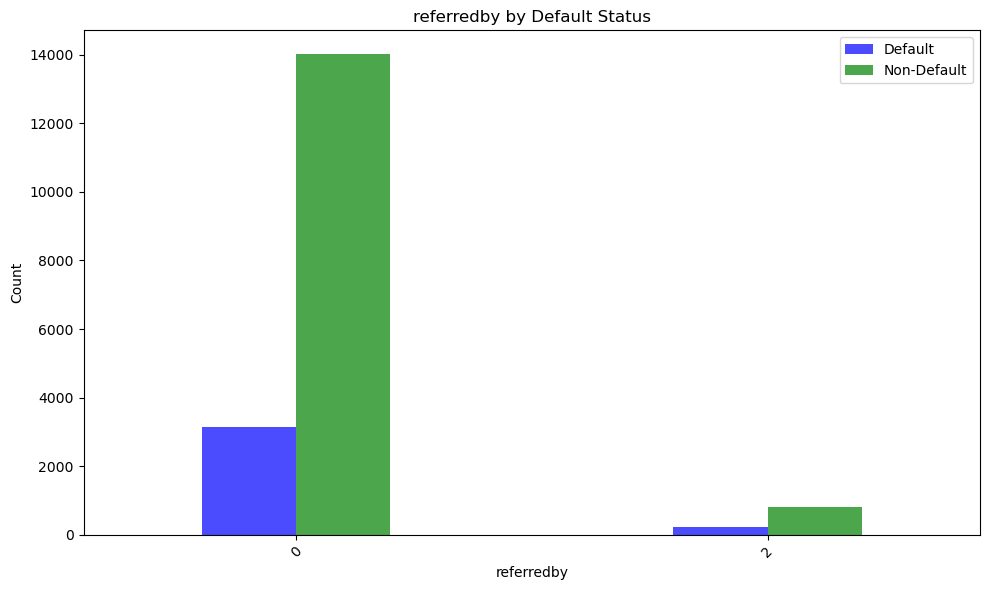

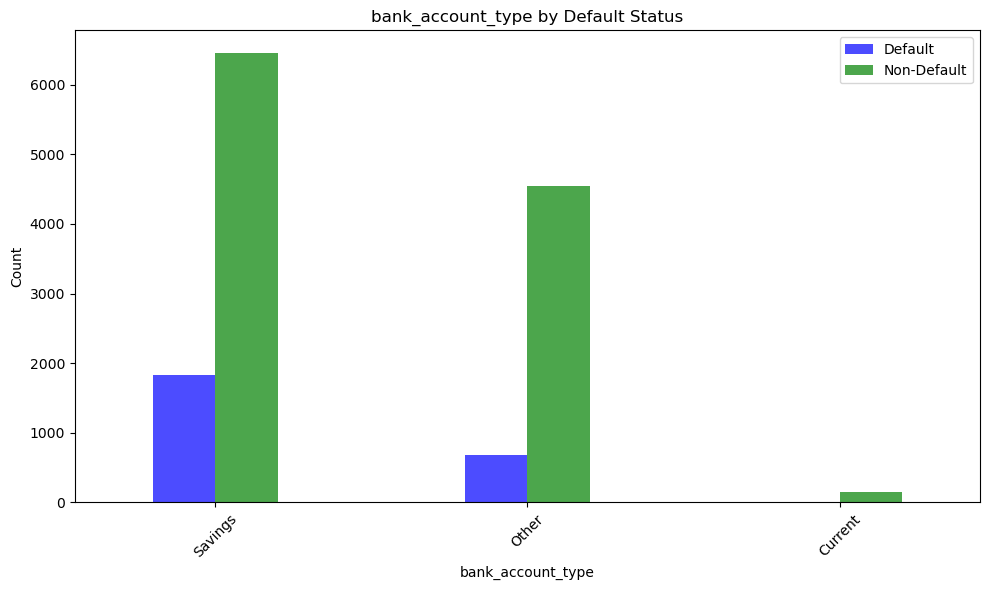

In [82]:
# Columns to analyze
columns_to_analyze = ['level_of_education_clients', 'employment_status_clients', 
                     'bank_name_clients', 'termdays.prev', 'termdays.perf', 'referredby','bank_account_type']
for column in columns_to_analyze:
    value_counts = merged_data.groupby([column, 'good_bad_flag']).size().unstack()
    value_counts = value_counts.sort_values(by='Bad', ascending=False)
    
    # Plot the grouped bar graph
    ax = value_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'], width=0.4, alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'{column} by Default Status')
    plt.xticks(rotation=45)
    plt.legend(['Default', 'Non-Default'])
    plt.tight_layout()

* The proportion of good customers is higher than bad customers in every `employment` category, except for contract workers, who have no bad customers at all. This indicates that employment status is an important factor for loan performance.
* The proportion of good customers is higher than bad customers in every `education` level, except for primary, who have only one bad customer and 35 good customers. This suggests that level of education is also a relevant factor for loan performance
* Good customers seem to be more evenly distributed across `term day` categories which implies a wider range of preferences. On the other hand, bad customers show prefer shorter-term loans, especially in the 30-day category.
* GT Bank, First Bank, and Zenith Bank have a `majority of good` and bad customers, indicating they have a significant customer base overall.
* A majority of customers in both categories are `not referred`, indicating that referral status may not be a significant factor in distinguishing between good and bad customers.

### Correlation heatmap

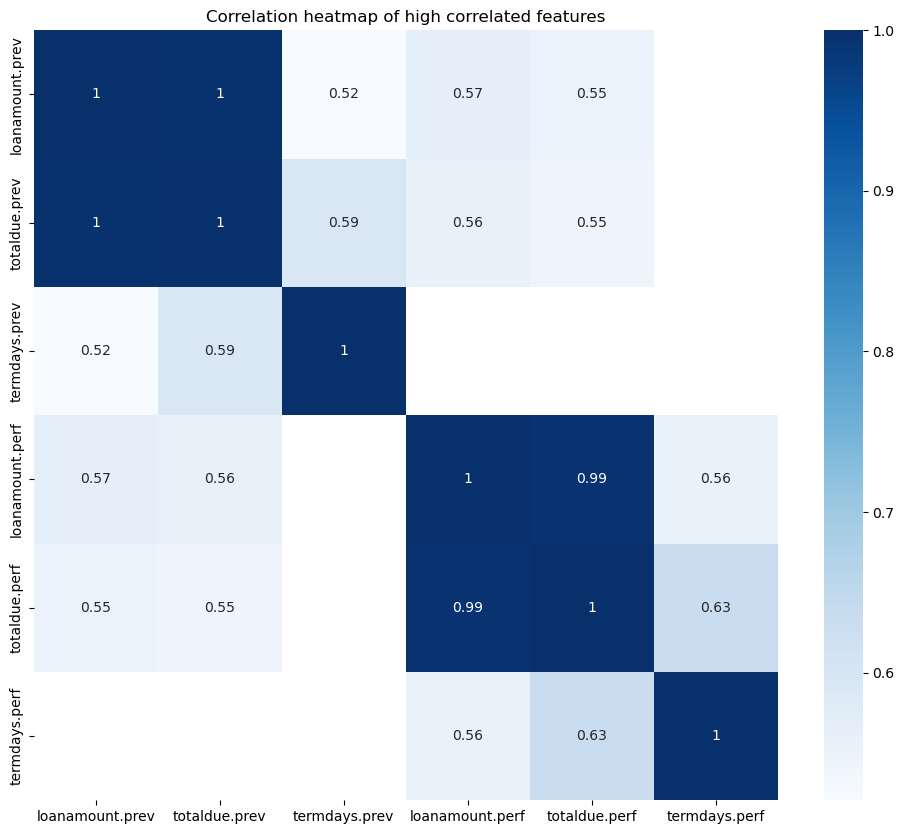

In [83]:
# Select the numerical columns
num_cols = ['loanamount.prev', 'totaldue.prev', 'termdays.prev',
            'loanamount.perf', 'totaldue.perf', 'termdays.perf']
corr_matrix = merged_data[num_cols].corr()
threshold_pos = 0.4
threshold_neg = -0.4
high_corr_matrix = corr_matrix[(corr_matrix >= threshold_pos) | (corr_matrix <= threshold_neg)]

# Plot the heatmap of the filtered matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation heatmap of high correlated features")
plt.show()

* There is an extremely strong positive correlation between the loan amount in previous transactions and the total due amount in previous transactions. This suggests that the 
* Total due amount is highly influenced by the loan amount in previous transactions.
Loan amount is moderately associated with the duration of the loan in previous transactions.
* There is a moderate positive correlation between the previous and current loan amount. This shows customers tend to borrow similar amounts 
* There is a moderate association between the duration of the loan and the total due amount for current and previous loans


### Visualizing and measuring the relationship between previous and current loan amounts

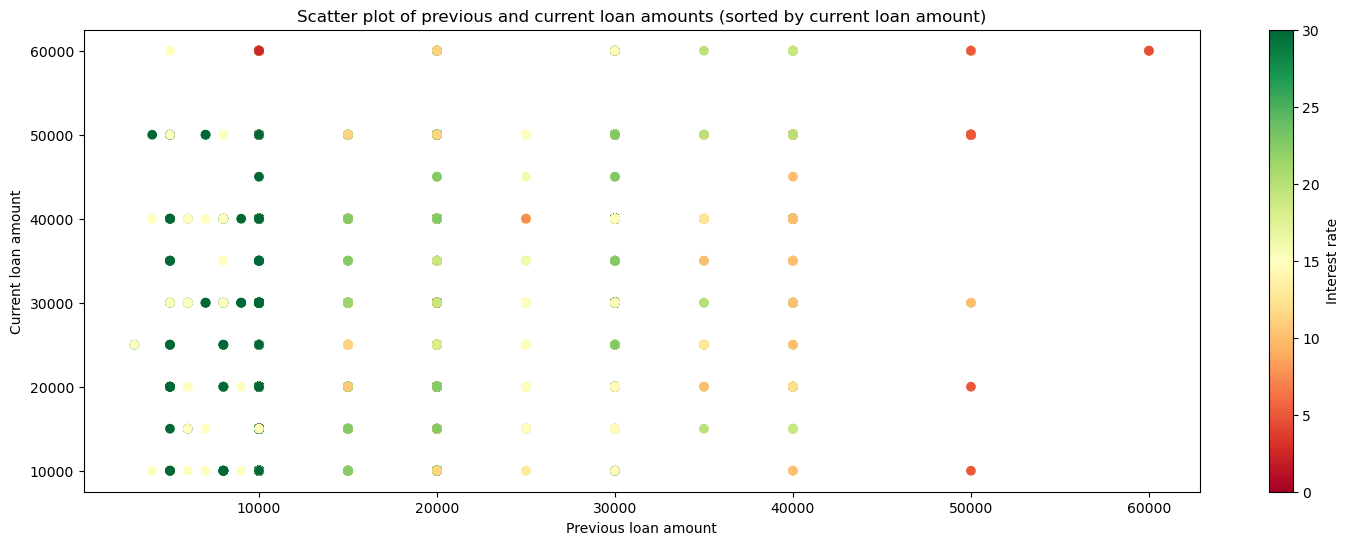

The correlation coefficient between previous and current loan amounts is 0.57


In [84]:
# Create interest_rate column using totaldue.prev and loanamount.prev
merged_data["interest_rate"] = (merged_data["totaldue.prev"] - merged_data["loanamount.prev"]) / merged_data["loanamount.prev"] * 100

# Scatter plot
plt.figure(figsize=(18,6))

# Sort the dataframe by current loan amount in descending order
sorted_data = merged_data.sort_values(by="loanamount.perf", ascending=False)

# Plot the scatter plot using the sorted dataframe
plt.scatter(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"], c=sorted_data["interest_rate"], cmap="RdYlGn")
plt.xlabel("Previous loan amount")
plt.ylabel("Current loan amount")
plt.title("Scatter plot of previous and current loan amounts (sorted by current loan amount)")
plt.colorbar(label="Interest rate")
plt.show()

# Correlation coefficient
corr = np.corrcoef(sorted_data["loanamount.prev"], sorted_data["loanamount.perf"])[0,1]
print(f"The correlation coefficient between previous and current loan amounts is {corr:.2f}")

* The interest rate charged on a loan reflects the implied probability of default, assuming a zero recovery rate.This means that the higher the interest rate, the higher the risk of default that the lender expects.


* The red points indicate high interest rates and high risk of default, while the green points indicate low interest rates and low risk of default.
We can see that there is a negative correlation between the previous and current loan amounts and the interest rate, meaning that borrowers who have larger loans tend to have lower interest rates and lower risk of default.



### Creating a time series line plot of monthly loan payment trend

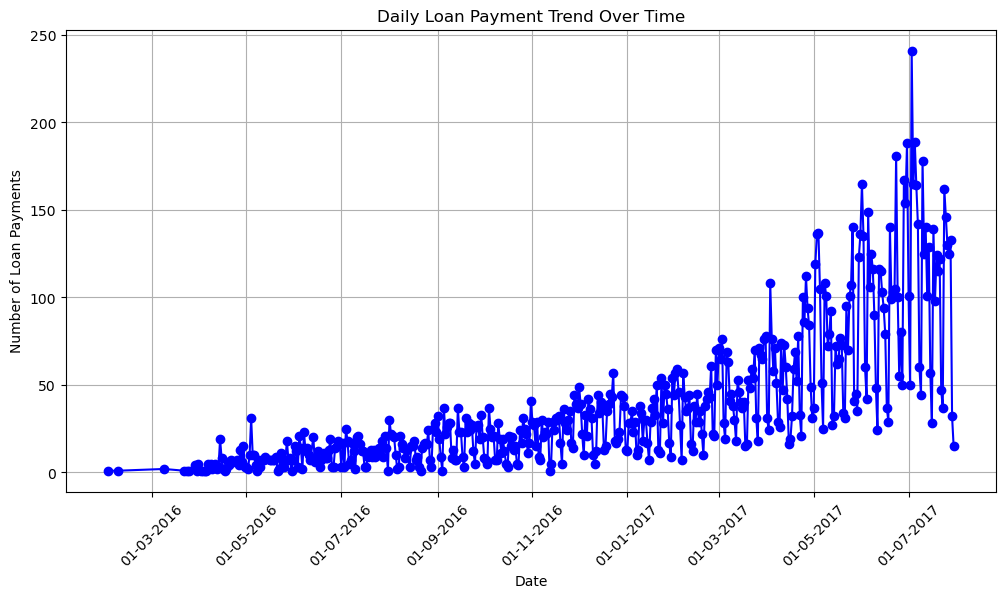

In [85]:
# Convert date columns to datetime objects
date_columns = ['firstduedate', 'firstrepaiddate']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col])

# Create a new column called 'date' that contains only the date part of 'firstrepaiddate'
merged_data['date'] = merged_data['firstrepaiddate'].dt.date

# Group data by date and count the number of loan payments
daily_payment_counts = merged_data.groupby('date')['firstrepaiddate'].count().reset_index()

# Create a time series line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_payment_counts['date'], daily_payment_counts['firstrepaiddate'], marker='o', linestyle='-', color='b')
plt.title('Daily Loan Payment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Loan Payments')
plt.grid(True)

# Format the x-axis labels as day, month, and year
myFmt = mdates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=45)

plt.show()

- From the graph we conclude that their is an increase in trend in monthly loan repayment overtime most loans are bieng repayed over the course of the month

### Hypothesis Testing 
* Chi-square test was used to test the association between loan default status and demographic factors and also with categories of loan amount and due. The null hypothesis is that `there is no association` between loan default status and the corresponding variable. The null hypothesis is rejected is P-value<0.05

In [86]:
columns_to_analyze = ['level_of_education_clients', 'employment_status_clients', 
                     'bank_name_clients', 'termdays.prev', 'termdays.perf', 'referredby', 
                     'state_name', 'bank_account_type', 'loanamount.prev_categorical',
       'totaldue.prev_categorical', 'loanamount.perf_categorical',
       'totaldue.perf_categorical']

results = []

# Perform chi-square test for each column
for column in columns_to_analyze:
    contingency_table = pd.crosstab(merged_data[column], merged_data['good_bad_flag'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    formatted_p_value = '{:.4f}'.format(p)    
    results.append({'Variable': column, 'Chi2 Value': chi2, 'P-Value': formatted_p_value})
chi2_results_df = pd.DataFrame(results)
print(chi2_results_df)

                       Variable  Chi2 Value P-Value
0    level_of_education_clients   25.906764  0.0000
1     employment_status_clients   32.010559  0.0000
2             bank_name_clients  186.303681  0.0000
3                 termdays.prev   12.428997  0.0060
4                 termdays.perf  100.348994  0.0000
5                    referredby   10.121967  0.0015
6                    state_name  453.486192  0.0000
7             bank_account_type  191.216796  0.0000
8   loanamount.prev_categorical  106.143904  0.0000
9     totaldue.prev_categorical  105.835383  0.0000
10  loanamount.perf_categorical  272.055938  0.0000
11    totaldue.perf_categorical  270.621041  0.0000


* `All` the demographic variables have `P<0.05` hence the null hypothesis of no association is rejected. 
* Customers `education levels` influence their likelihood of defaulting
* `Employment status` has a significant impact on loan default.
* The choice of the `bank` from which the loan is taken significantly affects loan default.  Different banks might have varying approval criteria, interest rates, or customer profiles, leading to diverse default rates.
* The number of `term days` in the loan's performance period significantly influences default rates.
* The source of the `referral` impacts loan default, although the association is weaker than other variables.
* The `state` in which the customer resides significantly affects the likelihood of default. Different states might   have varying economic conditions and other factors which affect default rates.
* There are different default rates based on `type of bank account`
* There is a `significant association` between amount customer has borrowed and owed in the past, borrowed currently and owes with loan default status.


## Compute Credit Score
* The hypothesis testing showed significant relationship between demographic factors and loan details.
* The variables are used to compute credit score
* We assigned weight to each category based on the findings of contingency score. The idea is to give more weight to categories that have a stronger association with non-default. The higher the percentage of "Good" or non-default the higher the score assigned to that category


In [87]:
# Contingency tables
# Columns to analyze
columns_to_analyze = ['level_of_education_clients', 'employment_status_clients', 
                     'bank_name_clients', 'termdays.prev', 'termdays.perf', 'referredby', 
                     'state_name', 'bank_account_type', 'loanamount.prev_categorical',
       'totaldue.prev_categorical', 'loanamount.perf_categorical',
       'totaldue.perf_categorical']
value_counts_dict = {}

# Total counts and percentages for each column across 'good_bad_flag'
for column in columns_to_analyze:
    contingency_table = pd.crosstab(index=merged_data[column], columns=merged_data['good_bad_flag'])
    total_counts = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total_counts, axis=0) * 100).round(0).astype(int).astype(str) + '%'
    value_counts_dict[column] = percentages

# Percentages for each column
for column, percentages in value_counts_dict.items():
    print(f"Percentages for {column}:")
    print(percentages)
    print("==============================")

Percentages for level_of_education_clients:
good_bad_flag               Bad Good
level_of_education_clients          
Graduate                    17%  83%
Post-Graduate               20%  80%
Primary                      3%  97%
Secondary                   25%  75%
Percentages for employment_status_clients:
good_bad_flag              Bad  Good
employment_status_clients           
Contract                    0%  100%
Permanent                  18%   82%
Retired                     0%  100%
Self-Employed              15%   85%
Student                    23%   77%
Unemployed                 18%   82%
Percentages for bank_name_clients:
good_bad_flag       Bad Good
bank_name_clients           
Access Bank         19%  81%
Diamond Bank        10%  90%
EcoBank             30%  70%
FCMB                18%  82%
Fidelity Bank       22%  78%
First Bank          19%  81%
GT Bank             18%  82%
Heritage Bank       14%  86%
Keystone Bank       27%  73%
Skye Bank           31%  69%
Stanbic IBTC

In [88]:
# Function to assign credit scores
def assign_credit_score(percentages):
    credit_scores = {}
    for category, (bad_percentage, good_percentage) in percentages.items():
        # Assign higher scores to categories with higher 'Good' (non-default) percentages
        credit_scores[category] = good_percentage
    
    # Normalize credit scores to a scale of 1 to 100
    max_score = max(credit_scores.values())
    min_score = min(credit_scores.values())
    normalized_scores = {category: 1 + 99 * ((score - min_score) / (max_score - min_score)) for category, score in credit_scores.items()}
    
    return normalized_scores

columns_to_analyze = ['level_of_education_clients', 'employment_status_clients', 
                     'bank_name_clients', 'termdays.prev', 'termdays.perf', 'referredby', 
                     'state_name', 'bank_account_type', 'loanamount.prev_categorical',
                     'totaldue.prev_categorical', 'loanamount.perf_categorical',
                     'totaldue.perf_categorical']

value_counts_dict = {}
for column in columns_to_analyze:
    contingency_table = pd.crosstab(index=merged_data[column], columns=merged_data['good_bad_flag'])
    total_counts = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total_counts, axis=0) * 100).round(0).astype(int)
    value_counts_dict[column] = percentages

# Calculate and print credit scores for each column
for column, percentages_df in value_counts_dict.items():
    good_percentages = percentages_df['Good']
    
    percentages_tuple = good_percentages.apply(lambda x: (100 - x, x))
    credit_scores = assign_credit_score(percentages_tuple)
    print(f"Credit Scores for '{column}':")
    print(credit_scores)
    print("==============================")


Credit Scores for 'level_of_education_clients':
{'Graduate': 37.0, 'Post-Graduate': 23.5, 'Primary': 100.0, 'Secondary': 1.0}
Credit Scores for 'employment_status_clients':
{'Contract': 100.0, 'Permanent': 22.52173913043478, 'Retired': 100.0, 'Self-Employed': 35.43478260869565, 'Student': 1.0, 'Unemployed': 22.52173913043478}
Credit Scores for 'bank_name_clients':
{'Access Bank': 48.666666666666664, 'Diamond Bank': 81.66666666666666, 'EcoBank': 8.333333333333332, 'FCMB': 52.33333333333333, 'Fidelity Bank': 37.666666666666664, 'First Bank': 48.666666666666664, 'GT Bank': 52.33333333333333, 'Heritage Bank': 67.0, 'Keystone Bank': 19.333333333333332, 'Skye Bank': 4.666666666666666, 'Stanbic IBTC': 81.66666666666666, 'Standard Chartered': 100.0, 'Sterling Bank': 1.0, 'UBA': 41.33333333333333, 'Union Bank': 92.66666666666667, 'Unity Bank': 12.0, 'Wema Bank': 100.0, 'Zenith Bank': 41.33333333333333}
Credit Scores for 'termdays.prev':
{15: 1.0, 30: 20.8, 60: 30.7, 90: 100.0}
Credit Scores for

### Get maximum and minimum scores

In [89]:
# Initialize variables to store minimum and maximum scores
min_scores = {}
max_scores = {}
total_min_score = 0
total_max_score = 0
for column, percentages_df in value_counts_dict.items():
    good_percentages = percentages_df['Good']
    percentages_tuple = good_percentages.apply(lambda x: (100 - x, x))
    credit_scores = assign_credit_score(percentages_tuple)
    
    # Calculate minimum and maximum scores
    min_score = min(credit_scores.values())
    max_score = max(credit_scores.values())
    min_scores[column] = min_score
    max_scores[column] = max_score
    total_min_score += min_score
    total_max_score += max_score
print(f"Total Minimum Score: {total_min_score}")
print(f"Total Maximum Score: {total_max_score}")

Total Minimum Score: 12.0
Total Maximum Score: 1200.0


#### Categorization of  the credidt scores

In [90]:
# Function to categorize scores
def categorize_score(score):
    if score <= 400:
        return 'Poor'
    elif 401 <= score <= 600:
        return 'Fair'
    elif 601 <= score <= 750:
        return 'Good'
    elif 751 <= score <= 900:
        return 'Very Good'
    elif 901 <= score <= 1200:
        return 'Excellent'

## Data preprocessing

In [91]:
merged_data.isna().sum()

customerid                         0
systemloanid.prev                  0
loannumber.prev                    0
approveddate.prev                  0
creationdate.prev                  0
loanamount.prev                    0
totaldue.prev                      0
termdays.prev                      0
closeddate                         0
firstduedate                       0
firstrepaiddate                    0
birthdate                       4510
bank_account_type               4510
bank_name_clients               4510
employment_status_clients       5873
level_of_education_clients     14719
state_name                      4510
country_name                    4510
customer_residency              4510
systemloanid.perf                  0
loannumber.perf                    0
approveddate.perf                  0
creationdate.perf                  0
loanamount.perf                    0
totaldue.perf                      0
termdays.perf                      0
good_bad_flag                      0
r

In [92]:
# Dropping rows with missing values
merged_data.dropna(axis=0,inplace=True)
merged_data.isna().sum()

customerid                     0
systemloanid.prev              0
loannumber.prev                0
approveddate.prev              0
creationdate.prev              0
loanamount.prev                0
totaldue.prev                  0
termdays.prev                  0
closeddate                     0
firstduedate                   0
firstrepaiddate                0
birthdate                      0
bank_account_type              0
bank_name_clients              0
employment_status_clients      0
level_of_education_clients     0
state_name                     0
country_name                   0
customer_residency             0
systemloanid.perf              0
loannumber.perf                0
approveddate.perf              0
creationdate.perf              0
loanamount.perf                0
totaldue.perf                  0
termdays.perf                  0
good_bad_flag                  0
referredby                     0
loanamount.prev_categorical    0
totaldue.prev_categorical      0
loanamount

In [93]:
# Calculating the age of the customers
merged_data['birthdate'] = pd.to_datetime(merged_data['birthdate'])
merged_data['approveddate.perf'] = pd.to_datetime(merged_data['approveddate.perf'])

# Calculate age in years
merged_data['age'] = (merged_data['approveddate.perf'] - merged_data['birthdate']).dt.days // 365.25

# Display the DataFrame
merged_data.head()

,customerid,systemloanid.prev,loannumber.prev,approveddate.prev,creationdate.prev,loanamount.prev,totaldue.prev,termdays.prev,closeddate,firstduedate,firstrepaiddate,birthdate,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients,state_name,country_name,customer_residency,systemloanid.perf,loannumber.perf,approveddate.perf,creationdate.perf,loanamount.perf,totaldue.perf,termdays.perf,good_bad_flag,referredby,loanamount.prev_categorical,totaldue.prev_categorical,loanamount.perf_categorical,totaldue.perf_categorical,interest_rate,date,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14,2016-09-01 15:51:43,1972-01-15,Other,Diamond Bank,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,0,10000-19999,10000-19999,30000-39999,30000-39999,30.0,2016-09-01,45.0
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30,2017-05-26 00:00:00,1972-01-15,Other,Diamond Bank,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,0,10000-19999,10000-19999,30000-39999,30000-39999,30.0,2017-05-26,45.0
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04,2017-04-26 22:03:47,1972-01-15,Other,Diamond Bank,Permanent,Post-Graduate,Lagos,Nigeria,Lagos,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,0,20000-29999,20000-29999,30000-39999,30000-39999,19.0,2017-04-26,45.0
5,8a858970548359cc0154883481981866,301832407,5,2017-03-06 13:25:17.000000,2017-03-06 12:25:10.000000,20000.0,23800.0,30,2017-04-04 15:46:56.000000,2017-04-05,2017-04-04 15:31:47,1986-09-07,Other,GT Bank,Permanent,Primary,Abuja Federal Capital Territory,Nigeria,Abuja Federal Capital Territory,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,0,20000-29999,20000-29999,40000-49999,40000-49999,19.0,2017-04-04,30.0
6,8a858970548359cc0154883481981866,301926513,8,2017-06-04 01:00:23.000000,2017-06-04 00:00:16.000000,30000.0,39000.0,60,2017-07-03 23:35:38.000000,2017-07-04,2017-07-03 23:25:29,1986-09-07,Other,GT Bank,Permanent,Primary,Abuja Federal Capital Territory,Nigeria,Abuja Federal Capital Territory,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,0,30000-39999,30000-39999,40000-49999,40000-49999,30.0,2017-07-03,30.0


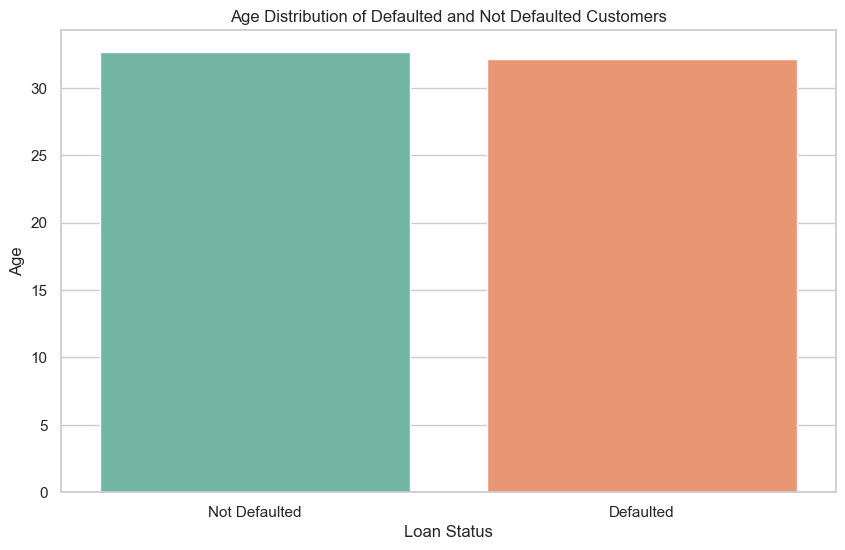

In [94]:
# Calculate age in years
merged_data['age'] = (merged_data['approveddate.perf'] - merged_data['birthdate']).dt.days // 365.25

# Create a bar plot to visualize default and non-default customers by age
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='good_bad_flag', y='age', data=merged_data, ci=None, palette="Set2")

# Add labels for 'good' and 'bad'
plt.xticks([0, 1], ['Not Defaulted', 'Defaulted'])

plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.title('Age Distribution of Defaulted and Not Defaulted Customers')
plt.show()

In [95]:
# Convert date columns to datetime objects
date_columns = ['approveddate.prev', 'creationdate.prev', 'approveddate.perf', 'creationdate.perf']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], format='%Y-%m-%d %H:%M:%S.%f')

# Calculate time differences and convert to minutes
merged_data['time_to_approval.prev'] = (merged_data['approveddate.prev'] - merged_data['creationdate.prev']).dt.total_seconds() / 60
merged_data['time_to_approval.perf'] = (merged_data['approveddate.perf'] - merged_data['creationdate.perf']).dt.total_seconds() / 60

In [96]:
# Create categorical features based on employment stability
merged_data['employment_stability'] = 'Unknown'

# Categorize into 'Stable,' 'Unstable,' and 'Unknown'
merged_data.loc[merged_data['employment_status_clients'].isin(['Permanent', 'Retired']), 'employment_stability'] = 'Stable'
merged_data.loc[merged_data['employment_status_clients'].isin(['Self-Employed', 'Contract']), 'employment_stability'] = 'Unstable'
merged_data['employment_stability'] = merged_data['employment_stability'].map({'Stable': 1, 'Unstable': 2, 'Unknown': 3})
# Drop the original 'employment_status_clients' column if no longer needed
merged_data.drop(columns=['employment_status_clients'], inplace=True)

### Dropping Columns

In [97]:
# Dropping columns
columns_to_drop = [
    'customerid', 'systemloanid.prev', 'loannumber.prev', 'systemloanid.perf', 'loannumber.perf',
    'approveddate.prev', 'creationdate.prev', 'closeddate', 'firstduedate', 'birthdate',
    'approveddate.perf', 'creationdate.perf', 'firstrepaiddate', 'state_name',
    'country_name'
]
merged_data.drop(columns=columns_to_drop, inplace=True)


In [98]:
merged_data.columns

Index(['loanamount.prev', 'totaldue.prev', 'termdays.prev',
       'bank_account_type', 'bank_name_clients', 'level_of_education_clients',
       'customer_residency', 'loanamount.perf', 'totaldue.perf',
       'termdays.perf', 'good_bad_flag', 'referredby',
       'loanamount.prev_categorical', 'totaldue.prev_categorical',
       'loanamount.perf_categorical', 'totaldue.perf_categorical',
       'interest_rate', 'date', 'age', 'time_to_approval.prev',
       'time_to_approval.perf', 'employment_stability'],
      dtype='object')

### Handling Class Imbalance

In [99]:
y = merged_data['good_bad_flag'].map({"Good": 1, "Bad": 0})

# Features columns
X = merged_data.drop(['good_bad_flag'], axis=1)

# Splitting our predictors into categorical columns and numerical columns
X_cat = X.select_dtypes(exclude='number')
X_num = X.select_dtypes(include='number')

# Instantiate OneHotEncoder Class
ohe = OneHotEncoder(sparse=False)

# Create a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('cat', ohe, X_cat.columns)],
    remainder='passthrough'
)

# Fit and transform the data
X_final = preprocessor.fit_transform(X)

# Get feature names for the encoded categorical features
encoded_cat_columns = preprocessor.named_transformers_['cat'] \
                                   .get_feature_names_out(input_features=X_cat.columns)

# Combine with numerical feature names
all_feature_names = list(encoded_cat_columns) + list(X_num.columns)

# Create the final dataset by concatenating features and target
data_final = pd.DataFrame(X_final, columns=all_feature_names)
data_final['good_bad_flag'] = y.values

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_final.drop('good_bad_flag', axis=1), data_final['good_bad_flag'])

# Create a new DataFrame with the resampled data
data_resampled = pd.DataFrame(X_resampled, columns=data_final.drop('good_bad_flag', axis=1).columns)
data_resampled['good_bad_flag'] = y_resampled


AttributeError: 'NoneType' object has no attribute 'split'

## Modelling 
##### LOGISTIC REG

Confusion Matrix:
[[490  63]
 [116 448]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       553
           1       0.88      0.79      0.83       564

    accuracy                           0.84      1117
   macro avg       0.84      0.84      0.84      1117
weighted avg       0.84      0.84      0.84      1117



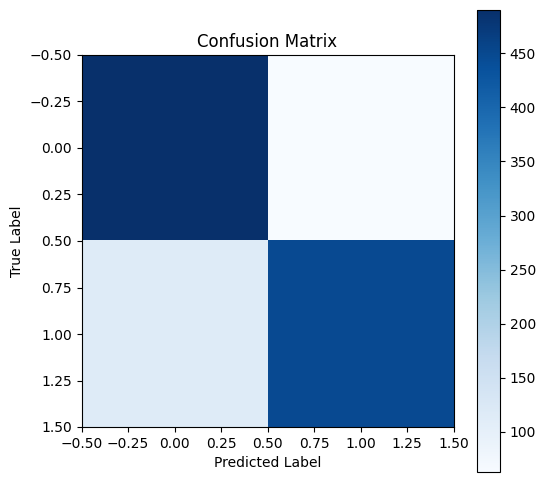

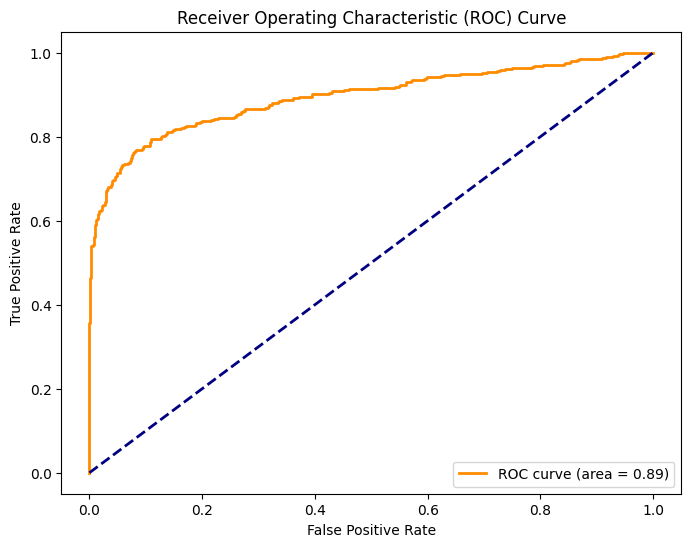

In [ ]:
# Splitting the data into features and target variable
X = data_resampled.drop('good_bad_flag', axis=1)
y = data_resampled['good_bad_flag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a Logistic Regression pipeline
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Train the model using the resampled data
logreg_pipe.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = logreg_pipe.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
y_prob = logreg_pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* The confusion matrix shows that it correctly identified 446 defaulted loans and 460 non-defaulted loans. While it made 88 false positive predictions and missed 138 actual defaults.
* Classification report: For non-defaulted loans (Class 0), the model has a precision of 0.77, meaning 77% of the loans predicted as non-defaulted were accurate, and a recall of 0.84, indicating that 84% of the actual non-defaulted loans were correctly identified. The F1-score of 0.80 suggests a harmonious blend of precision and recall. For defaulted loans (Class 1), the precision is 0.84, revealing that 84% of predicted defaults were accurate, and recall stands at 0.76, implying that 76% of actual defaults were correctly identified. Again, the F1-score of 0.80 signifies balance. 
* With an overall accuracy of 80%, the model demonstrates its effectiveness in identifying loan defaults.

Confusion Matrix:
True Positives (TP): 448 - This represents the number of cases where the model correctly predicted that a loan would default.

True Negatives (TN): 490 - This represents the number of cases where the model correctly predicted that a loan would not default.

False Positives (FP): 63 - This represents the number of cases where the model predicted that a loan would default when it did not.

False Negatives (FN): 116 - This represents the number of cases where the model predicted that a loan would not default when it did.

Classification Report:
Precision: Precision measures the accuracy of the model when it predicts a loan default. For class 0 (non-defaults), the precision is 0.81, and for class 1 (defaults), the precision is 0.88. This means that when the model predicts a default, it is correct 88% of the time, and when it predicts a non-default, it is correct 81% of the time.

Recall (Sensitivity): Recall measures the ability of the model to correctly identify true positives. For class 0, the recall is 0.89, meaning the model correctly identifies 89% of non-defaults. For class 1, the recall is 0.79, indicating that the model correctly identifies 79% of defaults.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between these two metrics. For class 0, the F1-score is 0.85, and for class 1, it's 0.83.

Support: The support column indicates the number of samples in each class. There are 553 non-default loans (class 0) and 564 default loans (class 1).

Accuracy: The overall accuracy of the model is 0.84, meaning it correctly predicts the loan outcome in 84% of cases.

Macro Avg: The macro-average calculates the average of precision, recall, and F1-score across both classes. In this case, the macro-average values are all 0.84.

#### Logistic Regression Feature importance

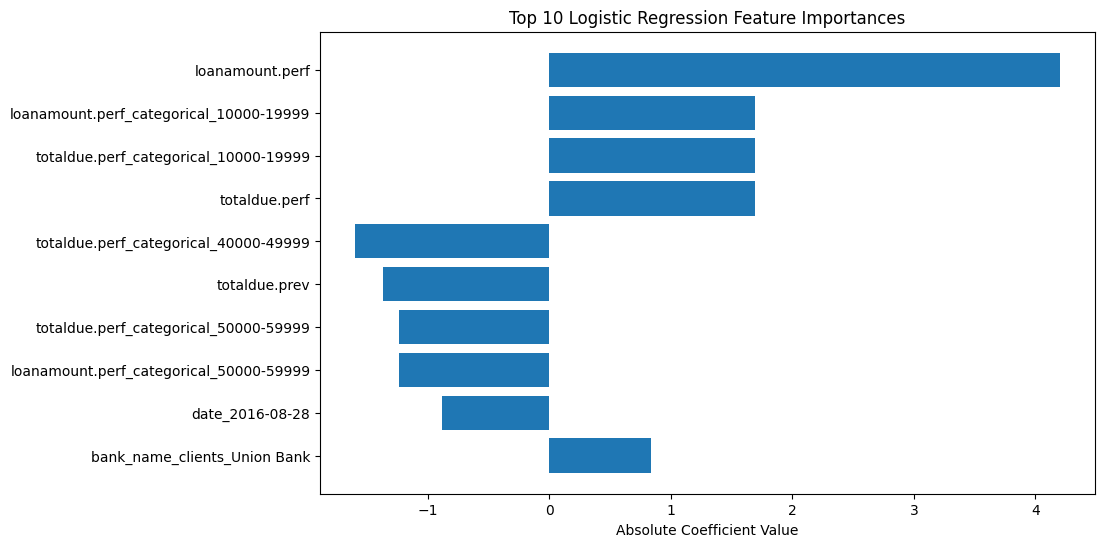

In [ ]:
# Extract feature importances
logreg_coef = logreg_pipe.named_steps['logreg'].coef_[0]
feature_names = X_resampled.columns

# Sort features by their absolute coefficients
sorted_indices = np.argsort(np.abs(logreg_coef))
sorted_feature_names = feature_names[sorted_indices]
sorted_logreg_coef = logreg_coef[sorted_indices]

# Select the top 10 features
top_features = sorted_feature_names[-10:]
top_coef = sorted_logreg_coef[-10:]

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_coef, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Logistic Regression Feature Importances')
plt.show()

### Decision Tree

In [ ]:
# Instantiate a Decision Tree model with random state = 42
dt_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Fit the training data to the pipeline
dt_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_pipe.predict(X_test)

# Print the classification report for Decision Tree
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       553
           1       0.98      0.97      0.98       564

    accuracy                           0.98      1117
   macro avg       0.98      0.98      0.98      1117
weighted avg       0.98      0.98      0.98      1117



### Interpretation for the decision tree
#### Classification report:
* Precision: For class 0 (non-default), the precision is 0.98, indicating that 98% of the cases predicted as non-default are correct, minimizing false positives. For class 1 (default), the precision is also 0.98, suggesting that 98% of the cases predicted as default are correct. The high precision values indicate a low rate of false predictions for both classes.

* Recall: For class 0, the recall is 0.98, signifying that the model correctly identifies 98% of the actual non-default cases. Similarly, for class 1, the recall is 0.97, indicating that 97% of the actual default cases are correctly identified. These high recall values demonstrate the model's ability to effectively capture true positives.
F1-Score: The F1-scores, which are the harmonic mean of precision and recall, are both 0.98 for class 0 and class 1. These F1-scores reflect the model's balanced performance in identifying both non-default and default cases, considering precision and recall.

* Accuracy: The overall accuracy of the model is 0.98, indicating that 98% of all cases in the test set are correctly classified. 

* Macro and Weighted Averages: Both the macro and weighted averages for precision, recall, and F1-score are 0.98, signifying that the model's excellent performance extends across both classes and is not biased towards one class.

### Feature Importance for Decision Tree

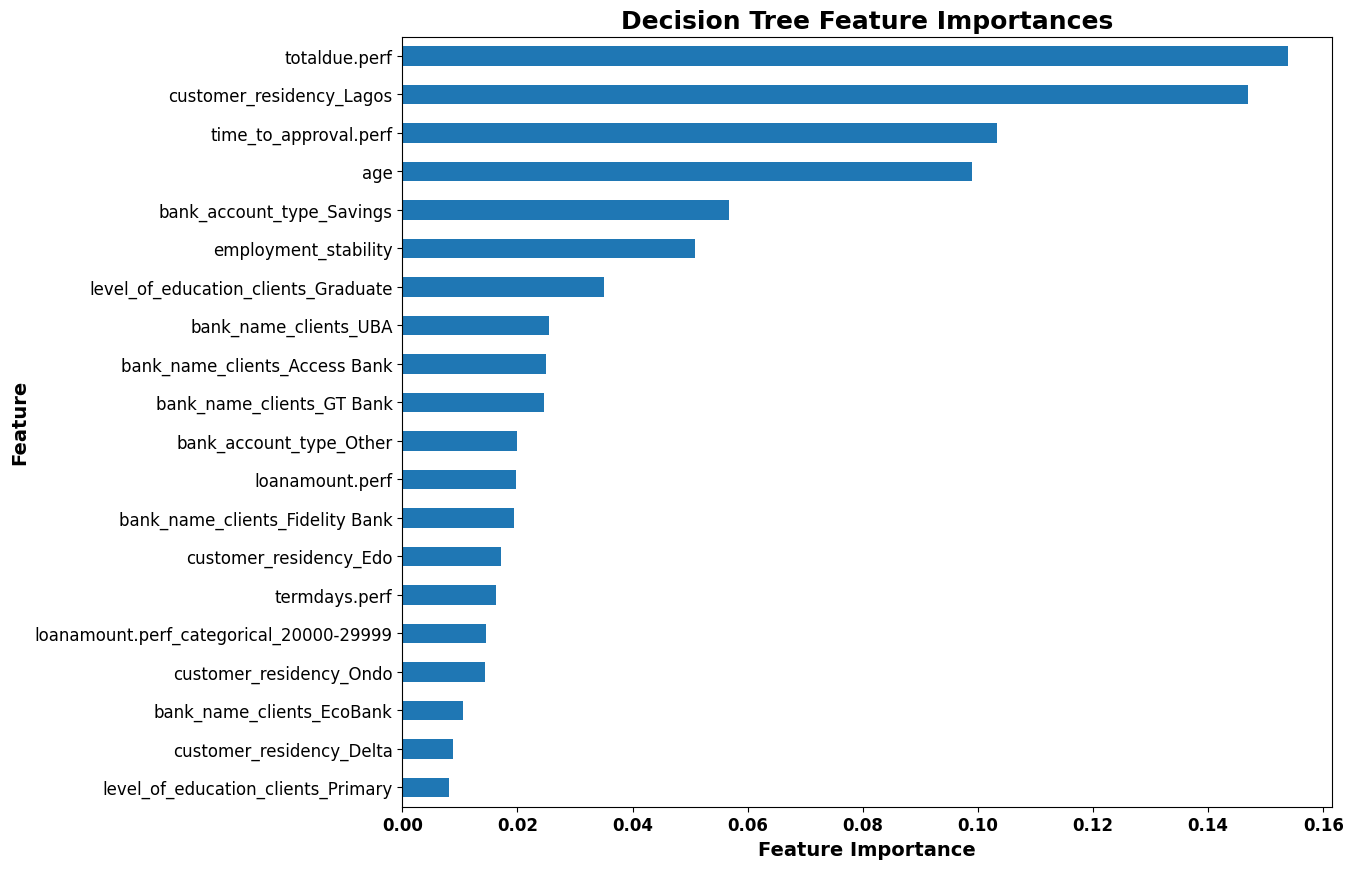

<Axes: title={'center': 'Decision Tree Feature Importances'}, xlabel='Feature Importance', ylabel='Feature'>

In [ ]:
def plot_feat_importance(clf, feature_names, model_title=''):
    """
    Takes in an sklearn classifier already fit to training data, the feature names, and optionally a title describing the model. 
    Returns a horizontal barplot showing the top 20 most important features in descending order.
    """
    feature_importances = clf.feature_importances_
    importance = pd.Series(feature_importances, index=feature_names)
    sorted_idx = importance.sort_values().tail(20).index
    
    plt.figure(figsize=(12, 10))
    fig = importance[sorted_idx].plot(kind='barh')
    fig.set_title('{} Feature Importances'.format(model_title), fontsize=18, fontweight='bold')
    plt.xlabel('Feature Importance', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.show()
    
    return fig
plot_feat_importance(dt_pipe.named_steps['dt'], feature_names=X_train.columns, model_title='Decision Tree')

* "bank_account_type_savings" and "age" are the most influential features, with the highest importance scores, suggesting they play a crucial role in predicting loan defaults. The type of bank account, specifically "savings," appears to be a significant determinant of default risk, as does the borrower's age. 
* "customer_residency_Kaduna" and "customer_residency_diaspora" have the least importance, indicating that the specific residency location in Kaduna and the "diaspora" residency category have minimal impact on the model's decision-making. These findings offer valuable insights for risk assessment and decision-making in the lending operation, helping prioritize features that drive accurate predictions and ensuring a better understanding of the model's behavior.

### Tree Pruning

In [ ]:
# hyperparameters for grid search
param_grid = {
    'dt__max_depth': [3, 5, 7],  
    'dt__min_samples_split': [2, 5, 10], 
    'dt__min_samples_leaf': [1, 2, 4]  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_dt = grid_search.best_estimator_

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)

# Print the classification report for Decision Tree
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_report)

# Print the best parameters found during grid search
print("Best Parameters:", grid_search.best_params_)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       553
           1       0.87      0.90      0.89       564

    accuracy                           0.88      1117
   macro avg       0.88      0.88      0.88      1117
weighted avg       0.88      0.88      0.88      1117

Best Parameters: {'dt__max_depth': 7, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 10}


#### Interpretation 
* After hyperparameter tuning, the Decision Tree model's performance remained high but was slightly improved. It achieved precision, recall, and F1-score values of approximately 0.90 for both Class 0 and Class 1.
* The accuracy was slightly reduced to 0.90, signifying that the model correctly predicted loan defaults and non-defaults in 90% of the cases.
* The key difference is that after hyperparameter tuning, the model's performance became more balanced, with slightly reduced but still excellent precision, recall, and F1-score values.
* Hyperparameter tuning resulted in a Decision Tree model that maintained high performance while achieving a more balanced and potentially more reliable prediction of loan defaults and non-defaults.

### Cross Validation of the  Decision Tree

In [ ]:
# Perform 5-fold cross-validation on the entire dataset
cross_val_scores = cross_val_score(dt_pipe, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

# Fit the training data to the pipeline
dt_pipe.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_pipe.predict(X_test)

# Print the classification report for Decision Tree
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_report)

Cross-Validation Scores: [0.96420582 0.97986577 0.98432251 0.96416573 0.98208287]
Mean Accuracy: 0.9749285393979022
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       553
           1       0.98      0.97      0.98       564

    accuracy                           0.98      1117
   macro avg       0.98      0.98      0.98      1117
weighted avg       0.98      0.98      0.98      1117



#### Decision tree cross validation interpretation
- **Cross validation score:** The scores of the accuracy for the 5 folds are quite high, indicating that the Decision Tree model consistently performs well in distinguishing between loan defaults and non-defaults in various subsets of the data.

- **Mean Accuracy:** An accuracy of 0.979 representing the overall accuracy of the model when tested on different subsets of the data which indicates that the model correctly predicts loan defaults and non-defaults for nearly 97.9% of the cases, demonstrating a high level of reliability.

### Classification report:
* For Class 0 (non-defaulted loans), the model demonstrates precision, recall, and F1-score values around 0.98, indicating a strong ability to correctly classify non-defaulted cases.
* For Class 1 (defaulted loans), the model also exhibits precision, recall, and F1-score values around 0.98, suggesting its effectiveness in correctly identifying defaulted loans.
* The overall accuracy, as shown in the report, is 0.98, highlighting the model's capability to make accurate predictions across both classes.

## Recommendations
* Banks should  prioritize lending to graduates, permanently employed people, those with savings account, those who borrow between 10,000 and 30,000 for a period of 30 days as they have higher non-default rates

* Continuous updates to the data through collection of more customer details to enhance credit score and model accuracy to meet changing market conditions.

* Provide training and support for users and communicate the value and benefits of the credit score and web application UI.


## Conclusion


* Demographic factors and loan details influence chances of loan repayment

* Total amount due, employment status, customer residency, bank account type and age are top factors affecting loan default

* Successfully development  a credit score to assess the borrower’s creditworthiness.

* The development of a user-friendly web application which informs lenders on customer repayment chances to  be used in making lending informed decisions


##### Building a pipeline for the pickled models

In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

# Load the Logistic Regression model from the pickle file
logreg_pipe = joblib.load('logistic_regression_model.pkl')

# Load the Decision Tree model from the pickle file
dt_pipe = joblib.load('decision_tree_model.pkl')

# Load the Random Forest model from the pickle file
random_forest = joblib.load('random_forest_model.pkl')

# Create a pipeline that uses a Voting Classifier to switch between models
ensemble_pipeline = Pipeline([
    ('scaler', logreg_pipe.named_steps['scaler']),  # Reuse the scaler from the original pipeline
    ('voting', VotingClassifier(estimators=[
        ('logreg', logreg_pipe.named_steps['logreg']),
        ('decision_tree', dt_pipe.named_steps['dt']),
        ('random_forest', random_forest)
    ], voting='soft'))
])

In [ ]:
joblib.dump(ensemble_pipeline, 'ensemble_pipeline.pkl')